In [2]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader

import pickle
                        
# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)

dataset_path = '/home/cc7486/Desktop/Research/cifar10/cifar10/train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms)
for i in range(1, 25):
    datas_path = f'/home/cc7486/Desktop/Research/cifar10/cifar10/backdoored-train/Train_test_{i}/'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation 
    L1 = len(clean_dataset_set)
    L2 = len(bck_dataset_set)
    print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len1 = int(0.8*L1)
    Len2 = int(0.8*L2)
    train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    with open(f"pickle/cifar/trainset_{i}.pkl", "wb") as file:
        pickle.dump(train_set, file)

    file.close()

    with open(f"pickle/cifar/cl-valiset_{i}.pkl", "wb") as file:
        pickle.dump(val_set, file)

    file.close()

    with open(f"pickle/cifar/bd-valiset_{i}.pkl", "wb") as file:
        pickle.dump(bck_val_set, file)

    file.close()

Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Imported:  50000 500 50500
Total length of Dataset Importe

# Training

Processing: 100%|██████████| 50/50 [48:13<00:00, 57.87s/iteration]


Best training Accuracy: 0.988441
Best validation Accuracy: 0.845842


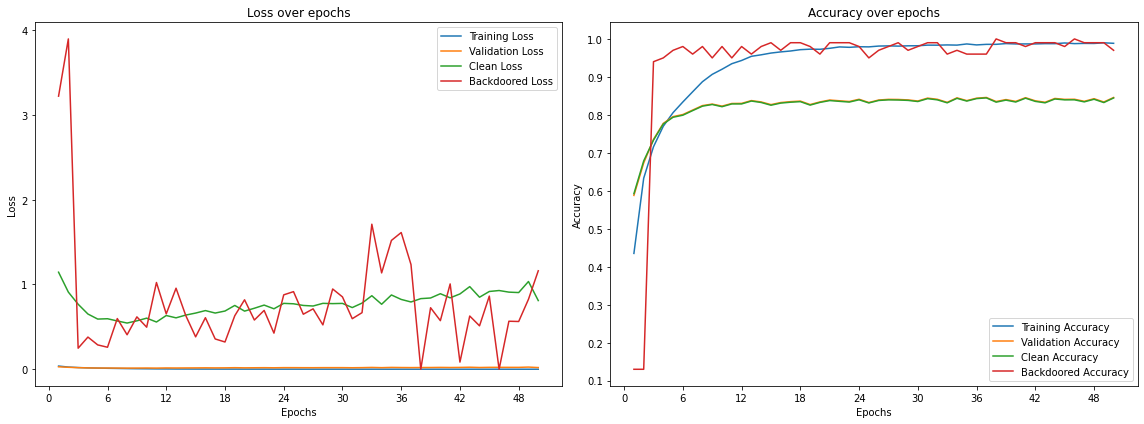

Processing: 100%|██████████| 50/50 [48:29<00:00, 58.18s/iteration]


Best training Accuracy: 0.988971
Best validation Accuracy: 0.848614


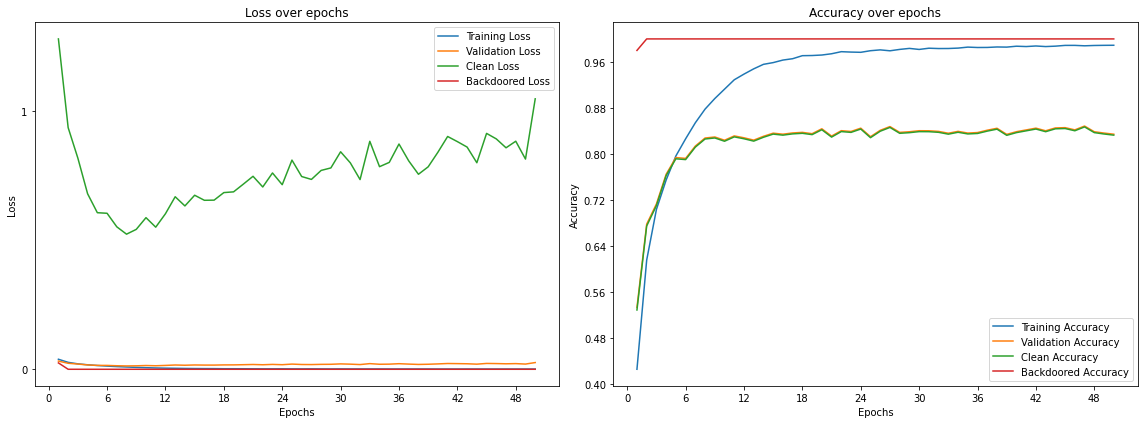

Processing: 100%|██████████| 50/50 [48:28<00:00, 58.17s/iteration]


Best training Accuracy: 0.989223
Best validation Accuracy: 0.847624


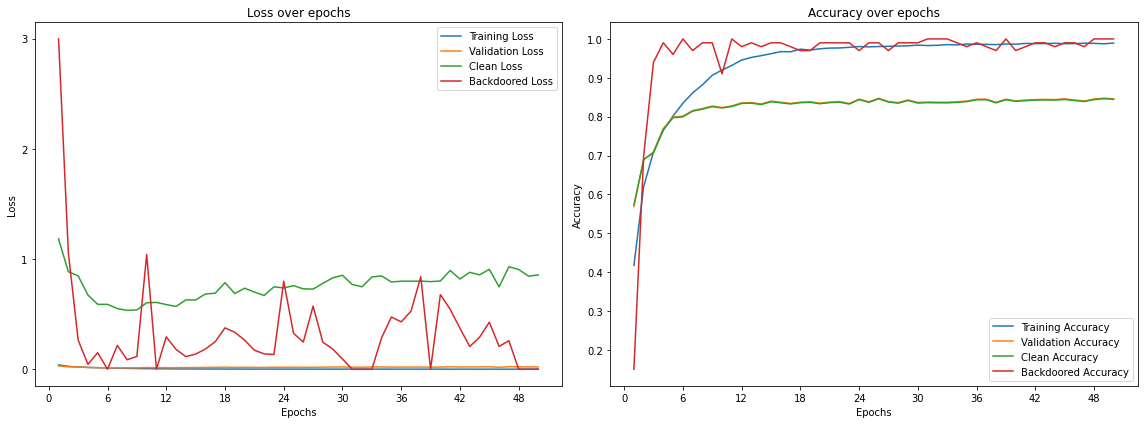

Processing: 100%|██████████| 50/50 [48:59<00:00, 58.79s/iteration]


Best training Accuracy: 0.988101
Best validation Accuracy: 0.849505


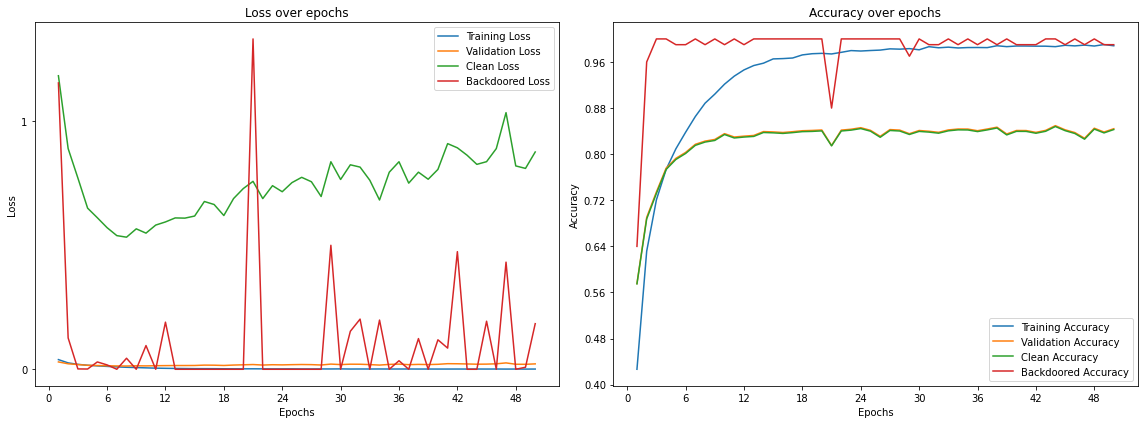

Processing: 100%|██████████| 50/50 [49:31<00:00, 59.43s/iteration]


Best training Accuracy: 0.989690
Best validation Accuracy: 0.849802


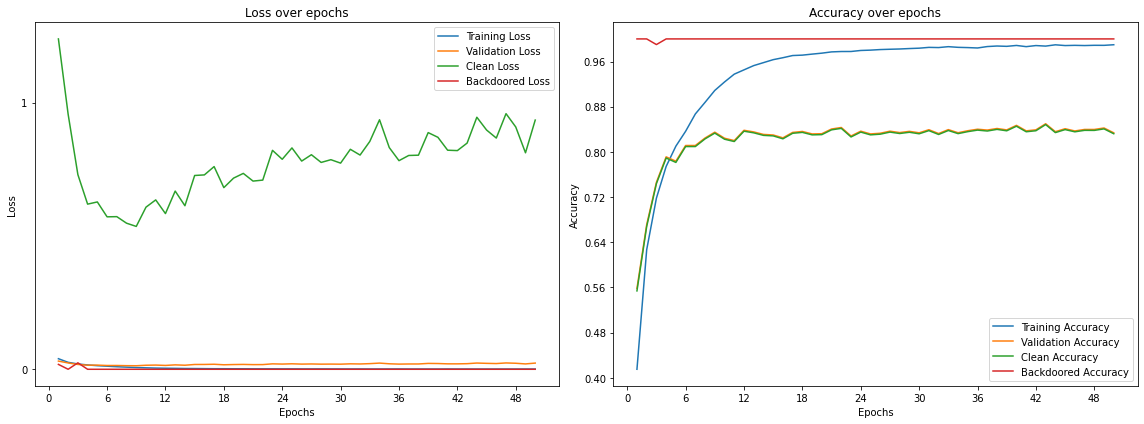

Processing: 100%|██████████| 50/50 [50:18<00:00, 60.36s/iteration]


Best training Accuracy: 0.989741
Best validation Accuracy: 0.845545


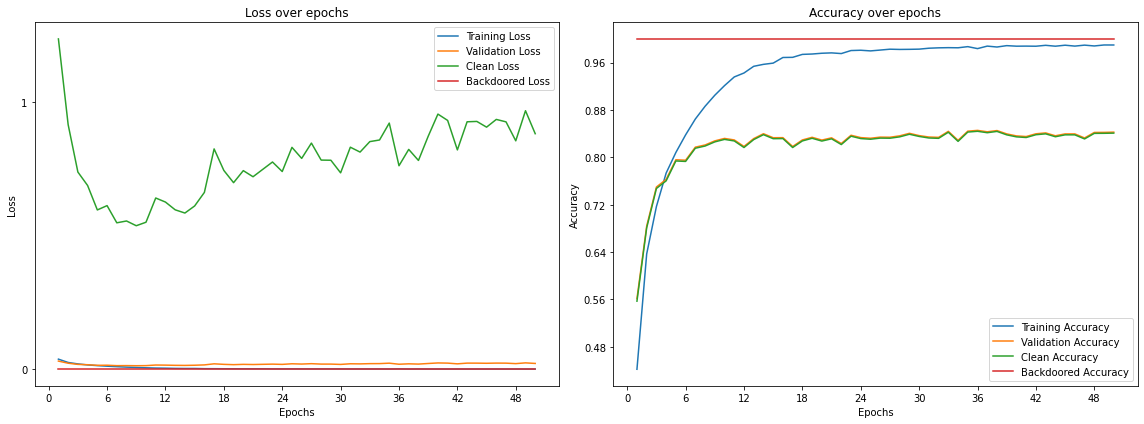

Processing: 100%|██████████| 50/50 [50:44<00:00, 60.89s/iteration]


Best training Accuracy: 0.988388
Best validation Accuracy: 0.848812


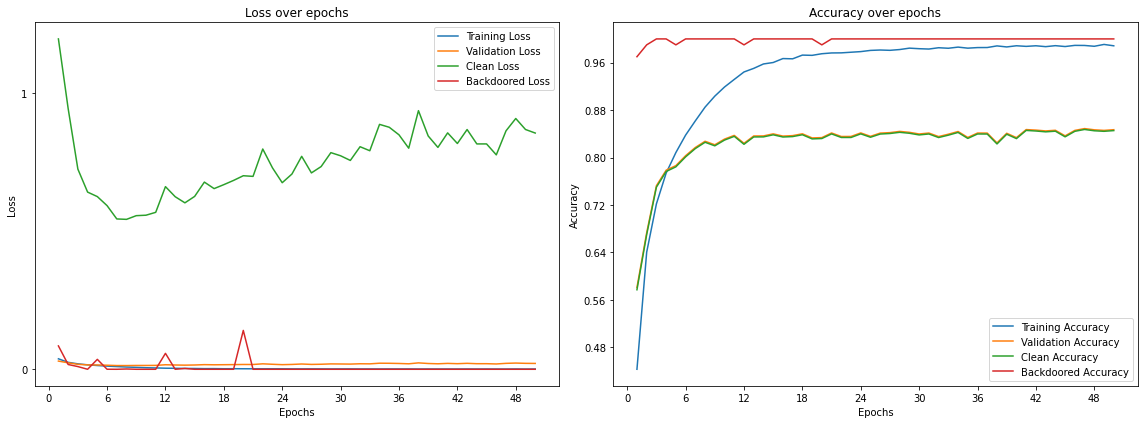

Processing: 100%|██████████| 50/50 [51:28<00:00, 61.77s/iteration]


Best training Accuracy: 0.987940
Best validation Accuracy: 0.848119


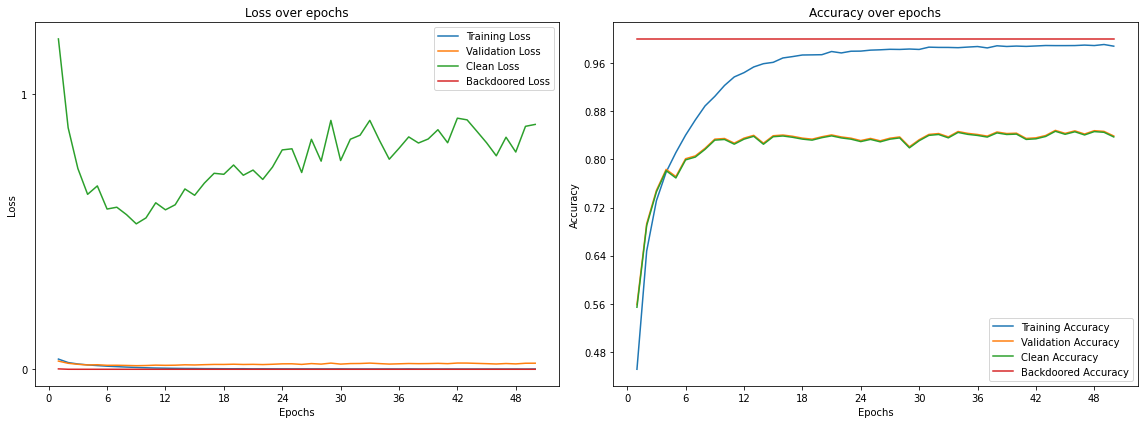

In [2]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader
from torchvision.models import alexnet
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)
    
# Prepare clean dataset
dataset_path = '/home/cc7486/Desktop/Research/cifar10/cifar10/train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms) 
L1 = len(clean_dataset_set)
Len1 = int(0.8*L1)
train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])

def Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path):
        best_model_weights = model.state_dict()
        best_acc = 0.0
        train_best_acc = 0.0
    
        for epoch in tqdm(range(num_epochs), desc="Processing", unit="iteration"):
            # print("epoch {}/{}".format(epoch+1,num_epochs))
            # print("*" * 10)

            for x in ["training","validation","clean","backdoor"]:
                if x == "training" :
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_accuracy = 0

                for data in dataloaders[x]:
                    img , y = data
                    img , y = img.to(device) , y.to(device)

                    optimizer.zero_grad()
                    y_pred = model(img)
                    loss = criterion(y_pred,y)
                    _, preds = torch.max(y_pred, dim=1)

                    if x == 'training':
                        loss.backward()
                        optimizer.step()

                    running_loss += loss.item()
                    running_accuracy += torch.sum(preds == y.data)


                epoch_loss = running_loss / dataset_sizes[x]
                epoch_acc = running_accuracy / dataset_sizes[x]

                # print('{} Loss: {:.4f} || Accuracy: {:.4f}'.format(x, epoch_loss, epoch_acc))

                # Save metrics
                if x == 'training':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                elif x == "validation":
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                elif x == "clean":
                    clean_loss.append(epoch_loss)
                    clean_acc.append(epoch_acc)
                else:
                    back_loss.append(epoch_loss)
                    back_acc.append(epoch_acc)

                # deep copy the model
                if x == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                elif x == "training" and epoch_acc > best_acc:
                    train_best_acc = epoch_acc


        # load best model weights
        torch.save(model.state_dict(), out_path)
        print('Best training Accuracy: {:4f}'.format(train_best_acc))
        print('Best validation Accuracy: {:4f}'.format(best_acc))

for case in range(1, 9):
    datas_path = f'/home/cc7486/Desktop/Research/cifar10/cifar10/backdoored-train/Train_test_{case}'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation
    L2 = len(bck_dataset_set)
    # print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len2 = int(0.8*L2)
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    #Loading the data into DataLoader
    train_loader = DataLoader(dataset=train_set, batch_size=40, shuffle=True)
    valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=True)
    # valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=False)
    clean_val_loader = DataLoader(dataset=val_set, batch_size=1, shuffle=False)
    bck_val_loader = DataLoader(dataset=bck_val_set, batch_size=1, shuffle=False)

    dataloaders = {'training':train_loader,'validation':valid_loader, "clean": clean_val_loader, "backdoor": bck_val_loader}
    dataset_sizes = {'training':len(train_loader.dataset),'validation':len(valid_loader.dataset), "clean": len(clean_val_loader), "backdoor": len(bck_val_loader)}
    # print(dataset_sizes)

    # Store metrics
    train_loss, val_loss, clean_loss, back_loss = [], [], [], []
    train_acc, val_acc, clean_acc, back_acc = [], [], [], []

    model = alexnet(weights=None, num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr = 0.0001)
    num_epochs = 50
    batch_size = 40
    out_path = f"models/cifar_models/alexnet_case_{case}.pt"

    #train the model
    Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path)

    import numpy as np
    from matplotlib.ticker import MaxNLocator
    # Convert the lists to numpy arrays for indexing
    train_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in train_loss])
    val_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in val_loss])
    clean_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in clean_loss])
    back_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in back_loss])
    train_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in train_acc])
    val_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in val_acc])
    clean_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in clean_acc])
    back_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in back_acc])
    epochs = len(train_loss) 

    plt.figure(figsize=(16, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, 1+epochs), y=train_los, label='Training Loss')
    sns.lineplot(x=range(1, 1+epochs), y=val_los, label='Validation Loss')
    sns.lineplot(x=range(1, 1+epochs), y=clean_los, label='Clean Loss')
    sns.lineplot(x=range(1, 1+epochs), y=back_los, label='Backdoored Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss') 
    plt.title('Loss over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, 1+epochs), y=train_ac, label='Training Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=val_ac, label='Validation Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=clean_ac, label='Clean Accuracy') 
    sns.lineplot(x=range(1, 1+epochs), y=back_ac, label='Backdoored Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Processing: 100%|██████████| 50/50 [48:30<00:00, 58.21s/iteration]


Best training Accuracy: 0.988861
Best validation Accuracy: 0.847426


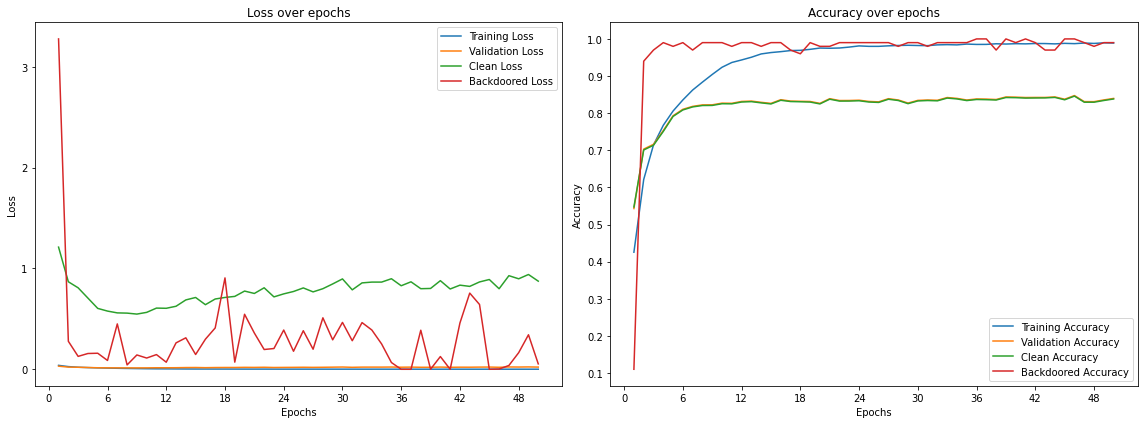

Processing: 100%|██████████| 50/50 [48:53<00:00, 58.67s/iteration]


Best training Accuracy: 0.988799
Best validation Accuracy: 0.843861


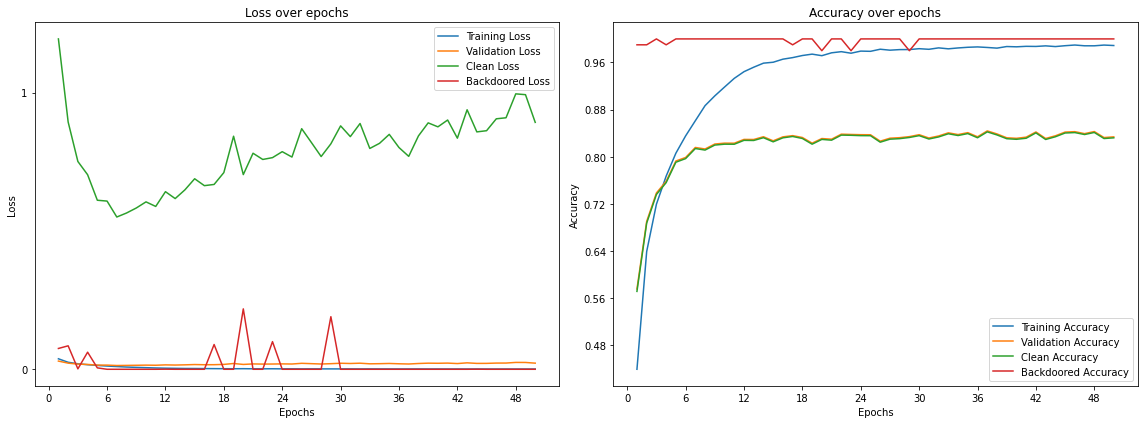

Processing: 100%|██████████| 50/50 [48:44<00:00, 58.50s/iteration]


Best training Accuracy: 0.988956
Best validation Accuracy: 0.843366


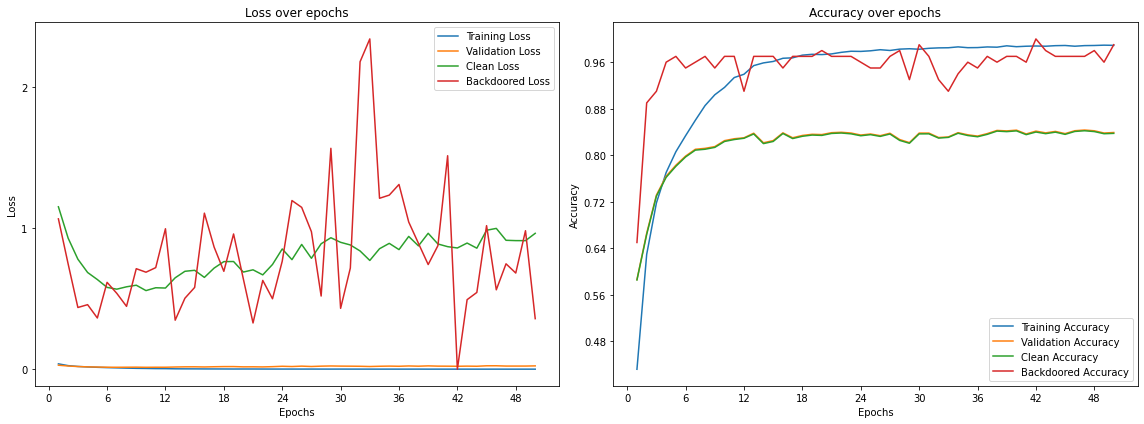

Processing: 100%|██████████| 50/50 [49:18<00:00, 59.16s/iteration]


Best training Accuracy: 0.989760
Best validation Accuracy: 0.850000


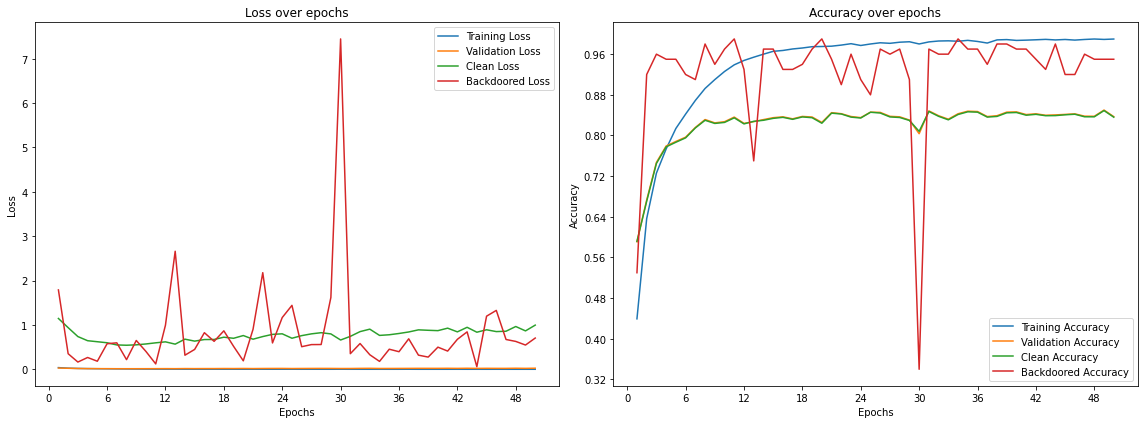

Processing: 100%|██████████| 50/50 [49:59<00:00, 60.00s/iteration]


Best training Accuracy: 0.989738
Best validation Accuracy: 0.848614


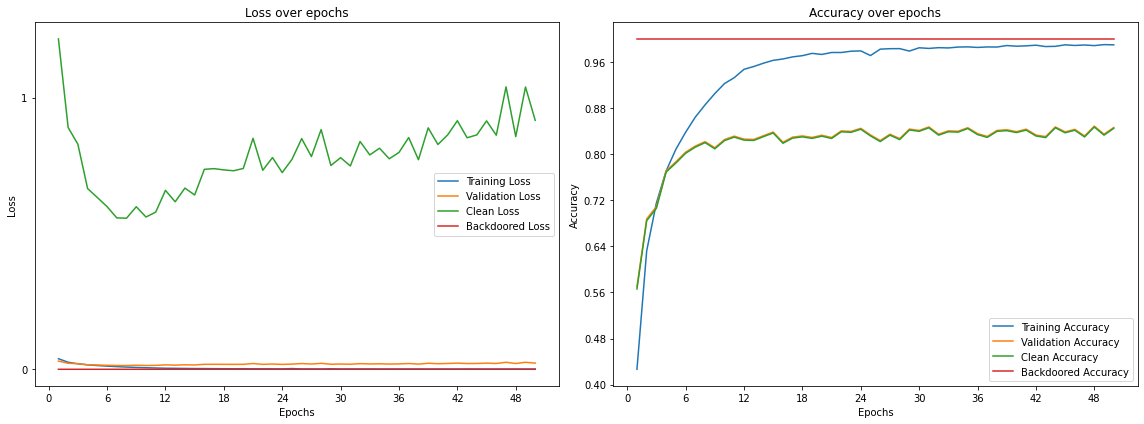

Processing: 100%|██████████| 50/50 [50:21<00:00, 60.43s/iteration]


Best training Accuracy: 0.989363
Best validation Accuracy: 0.849406


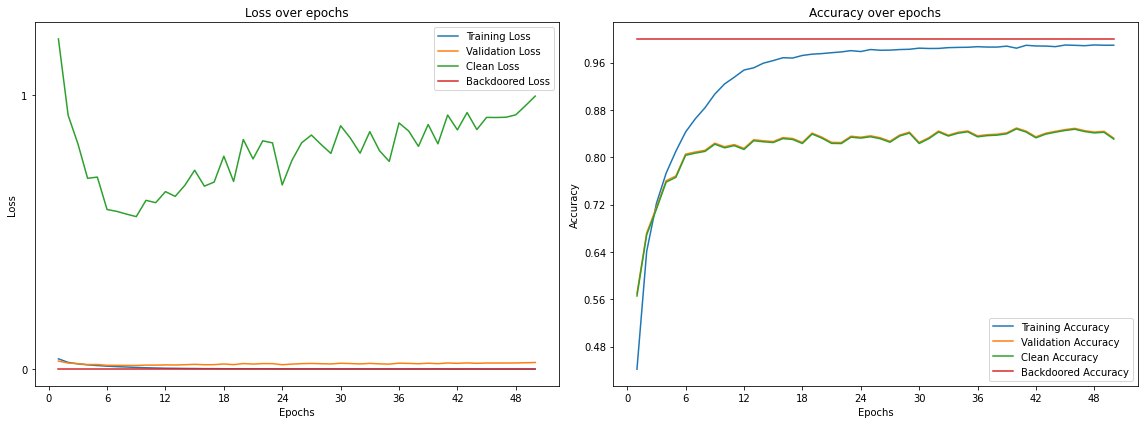

Processing: 100%|██████████| 50/50 [50:51<00:00, 61.03s/iteration]


Best training Accuracy: 0.990981
Best validation Accuracy: 0.845842


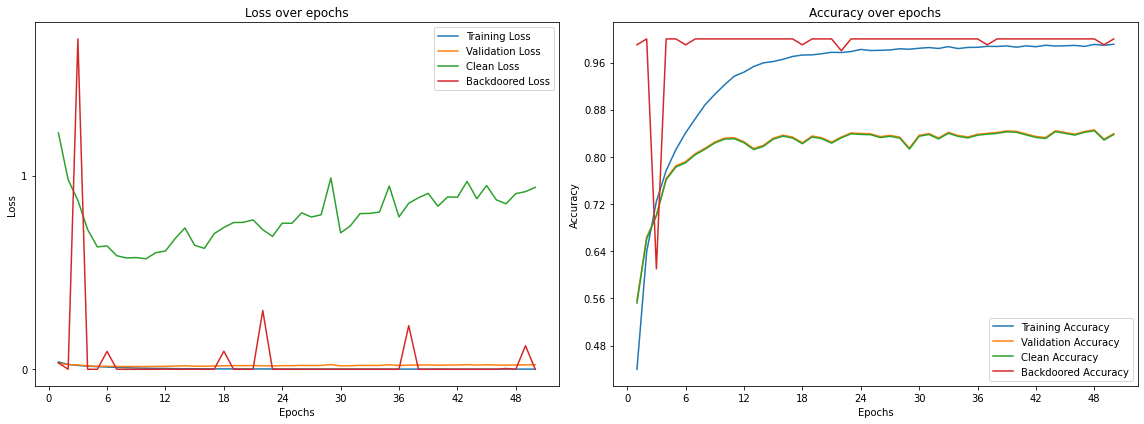

Processing: 100%|██████████| 50/50 [51:38<00:00, 61.98s/iteration]


Best training Accuracy: 0.990278
Best validation Accuracy: 0.848020


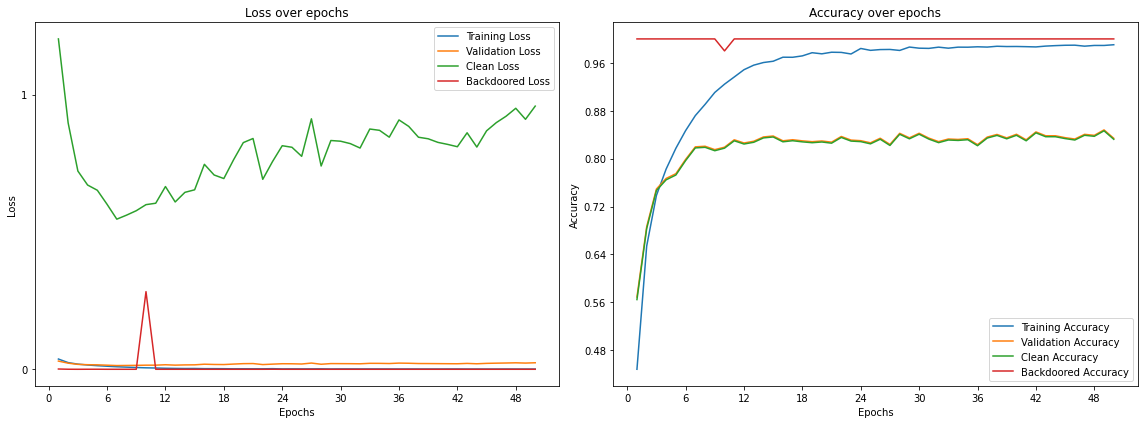

In [1]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader
from torchvision.models import alexnet
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)
    
# Prepare clean dataset
dataset_path = '/home/cc7486/Desktop/Research/cifar10/cifar10/train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms) 
L1 = len(clean_dataset_set)
Len1 = int(0.8*L1)
train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])

def Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path):
        best_model_weights = model.state_dict()
        best_acc = 0.0
        train_best_acc = 0.0
    
        for epoch in tqdm(range(num_epochs), desc="Processing", unit="iteration"):
            # print("epoch {}/{}".format(epoch+1,num_epochs))
            # print("*" * 10)

            for x in ["training","validation","clean","backdoor"]:
                if x == "training" :
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_accuracy = 0

                for data in dataloaders[x]:
                    img , y = data
                    img , y = img.to(device) , y.to(device)

                    optimizer.zero_grad()
                    y_pred = model(img)
                    loss = criterion(y_pred,y)
                    _, preds = torch.max(y_pred, dim=1)

                    if x == 'training':
                        loss.backward()
                        optimizer.step()

                    running_loss += loss.item()
                    running_accuracy += torch.sum(preds == y.data)


                epoch_loss = running_loss / dataset_sizes[x]
                epoch_acc = running_accuracy / dataset_sizes[x]

                # print('{} Loss: {:.4f} || Accuracy: {:.4f}'.format(x, epoch_loss, epoch_acc))

                # Save metrics
                if x == 'training':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                elif x == "validation":
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                elif x == "clean":
                    clean_loss.append(epoch_loss)
                    clean_acc.append(epoch_acc)
                else:
                    back_loss.append(epoch_loss)
                    back_acc.append(epoch_acc)

                # deep copy the model
                if x == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                elif x == "training" and epoch_acc > best_acc:
                    train_best_acc = epoch_acc


        # load best model weights
        torch.save(model.state_dict(), out_path)
        print('Best training Accuracy: {:4f}'.format(train_best_acc))
        print('Best validation Accuracy: {:4f}'.format(best_acc))

for case in range(9, 17):
    datas_path = f'/home/cc7486/Desktop/Research/cifar10/cifar10/backdoored-train/Train_test_{case}'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation
    L2 = len(bck_dataset_set)
    # print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len2 = int(0.8*L2)
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    #Loading the data into DataLoader
    train_loader = DataLoader(dataset=train_set, batch_size=40, shuffle=True)
    valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=True)
    # valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=False)
    clean_val_loader = DataLoader(dataset=val_set, batch_size=1, shuffle=False)
    bck_val_loader = DataLoader(dataset=bck_val_set, batch_size=1, shuffle=False)

    dataloaders = {'training':train_loader,'validation':valid_loader, "clean": clean_val_loader, "backdoor": bck_val_loader}
    dataset_sizes = {'training':len(train_loader.dataset),'validation':len(valid_loader.dataset), "clean": len(clean_val_loader), "backdoor": len(bck_val_loader)}
    # print(dataset_sizes)

    # Store metrics
    train_loss, val_loss, clean_loss, back_loss = [], [], [], []
    train_acc, val_acc, clean_acc, back_acc = [], [], [], []

    model = alexnet(weights=None, num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr = 0.0001)
    num_epochs = 50
    batch_size = 40
    out_path = f"models/cifar_models/alexnet_case_{case}.pt"

    #train the model
    Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path)

    import numpy as np
    from matplotlib.ticker import MaxNLocator
    # Convert the lists to numpy arrays for indexing
    train_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in train_loss])
    val_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in val_loss])
    clean_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in clean_loss])
    back_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in back_loss])
    train_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in train_acc])
    val_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in val_acc])
    clean_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in clean_acc])
    back_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in back_acc])
    epochs = len(train_loss) 

    plt.figure(figsize=(16, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, 1+epochs), y=train_los, label='Training Loss')
    sns.lineplot(x=range(1, 1+epochs), y=val_los, label='Validation Loss')
    sns.lineplot(x=range(1, 1+epochs), y=clean_los, label='Clean Loss')
    sns.lineplot(x=range(1, 1+epochs), y=back_los, label='Backdoored Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, 1+epochs), y=train_ac, label='Training Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=val_ac, label='Validation Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=clean_ac, label='Clean Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=back_ac, label='Backdoored Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Processing: 100%|██████████| 50/50 [46:54<00:00, 56.28s/iteration]


Best training Accuracy: 0.988713
Best validation Accuracy: 0.843267


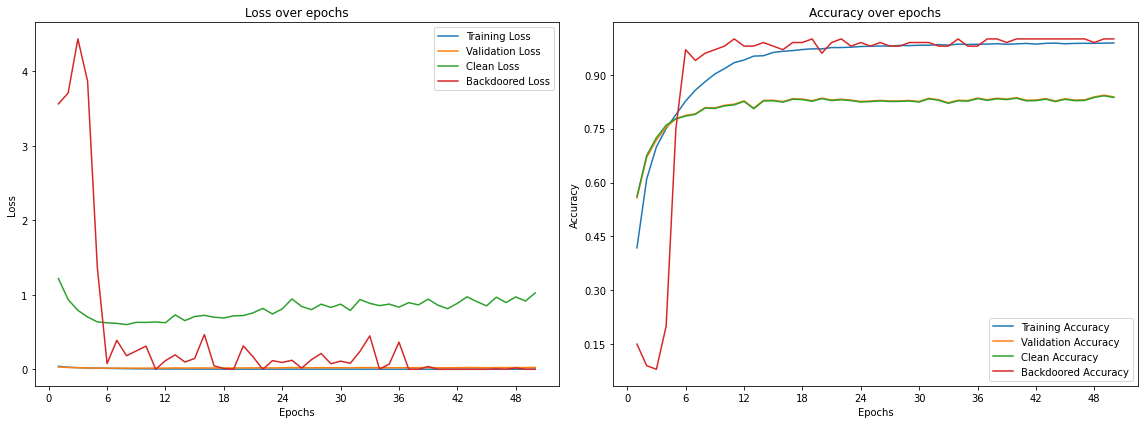

Processing: 100%|██████████| 50/50 [47:28<00:00, 56.98s/iteration]


Best training Accuracy: 0.988260
Best validation Accuracy: 0.844752


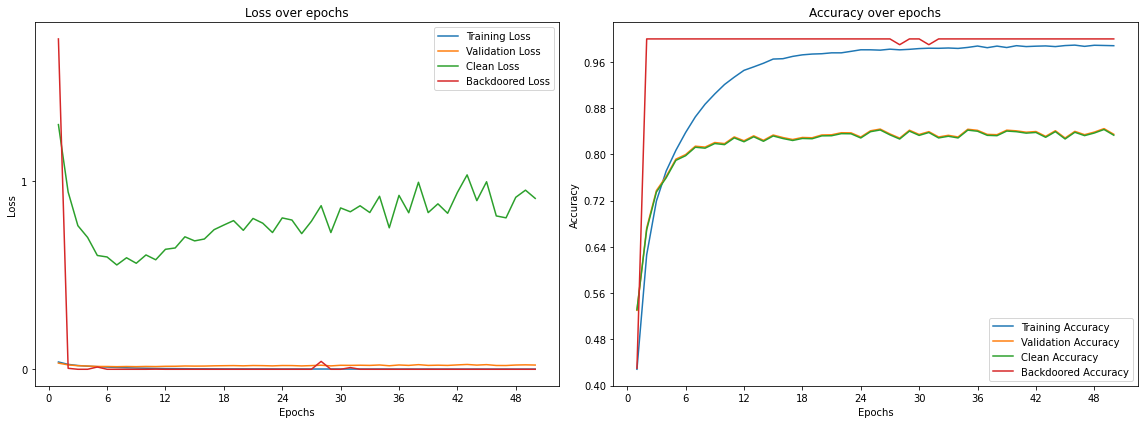

Processing: 100%|██████████| 50/50 [49:28<00:00, 59.36s/iteration]


Best training Accuracy: 0.988714
Best validation Accuracy: 0.844257


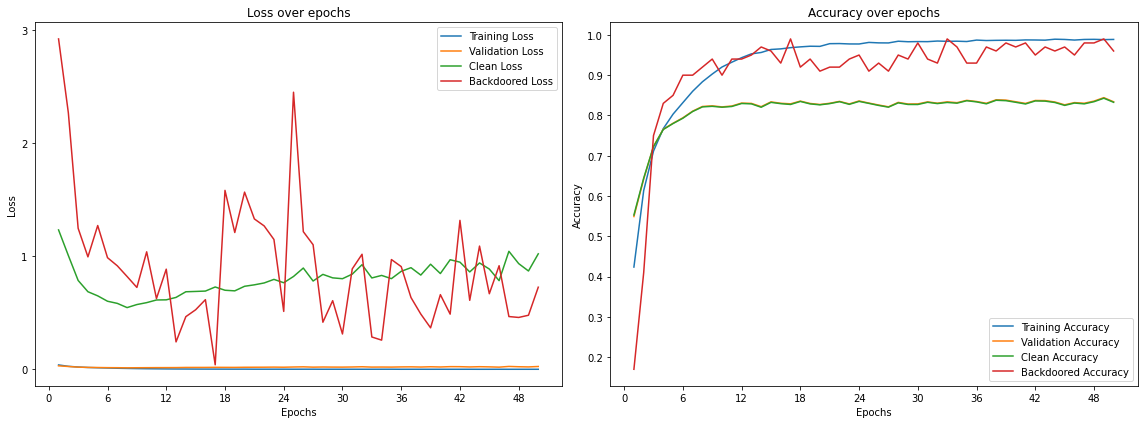

Processing: 100%|██████████| 50/50 [48:37<00:00, 58.35s/iteration]


Best training Accuracy: 0.988726
Best validation Accuracy: 0.845347


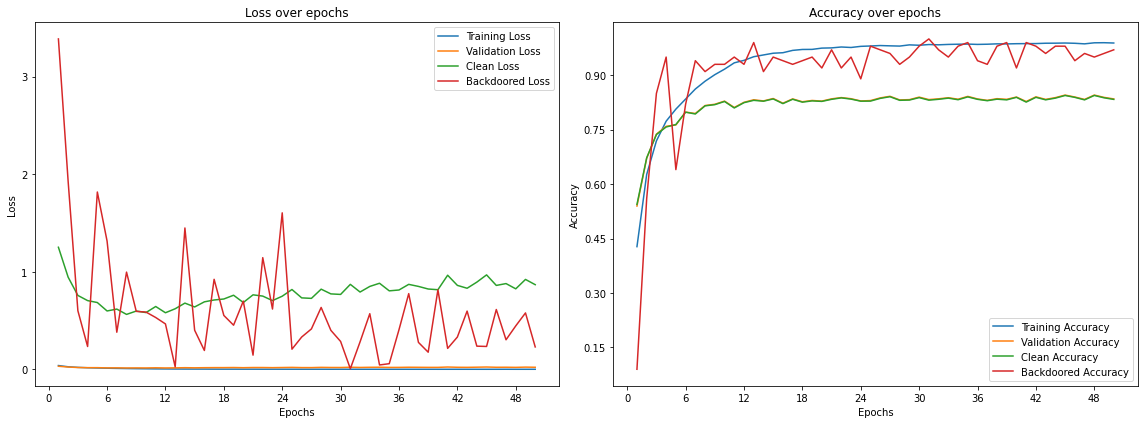

Processing: 100%|██████████| 50/50 [49:28<00:00, 59.37s/iteration]


Best training Accuracy: 0.988952
Best validation Accuracy: 0.848119


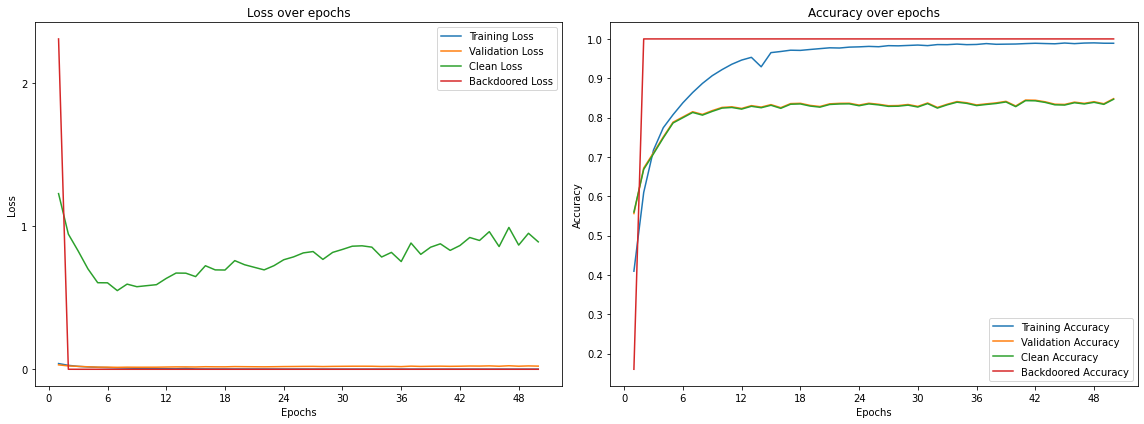

Processing: 100%|██████████| 50/50 [49:47<00:00, 59.74s/iteration]


Best training Accuracy: 0.989458
Best validation Accuracy: 0.845446


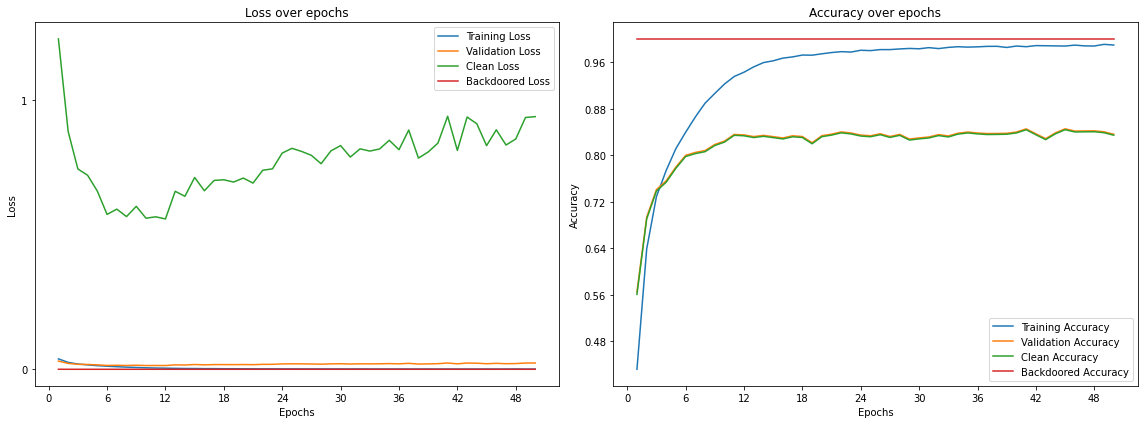

Processing: 100%|██████████| 50/50 [50:38<00:00, 60.77s/iteration]


Best training Accuracy: 0.988364
Best validation Accuracy: 0.843069


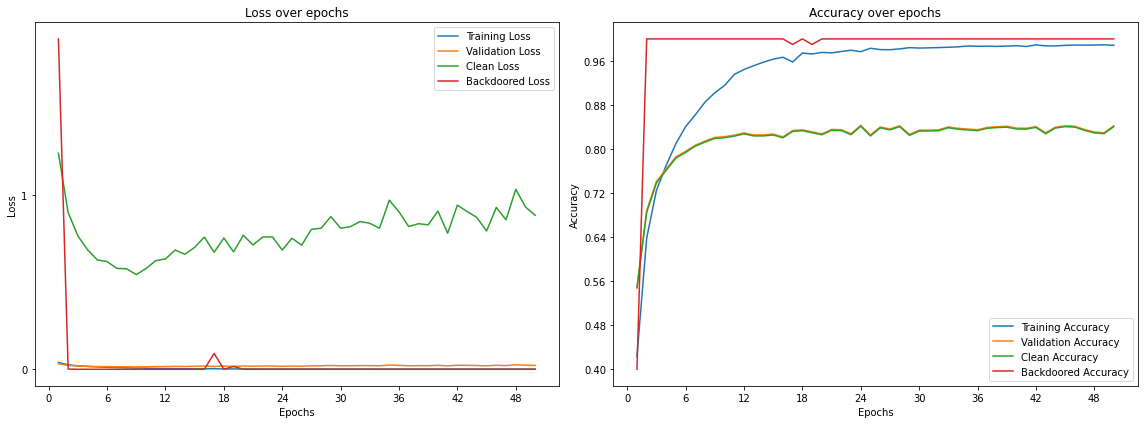

Processing: 100%|██████████| 50/50 [50:44<00:00, 60.89s/iteration]


Best training Accuracy: 0.988796
Best validation Accuracy: 0.846337


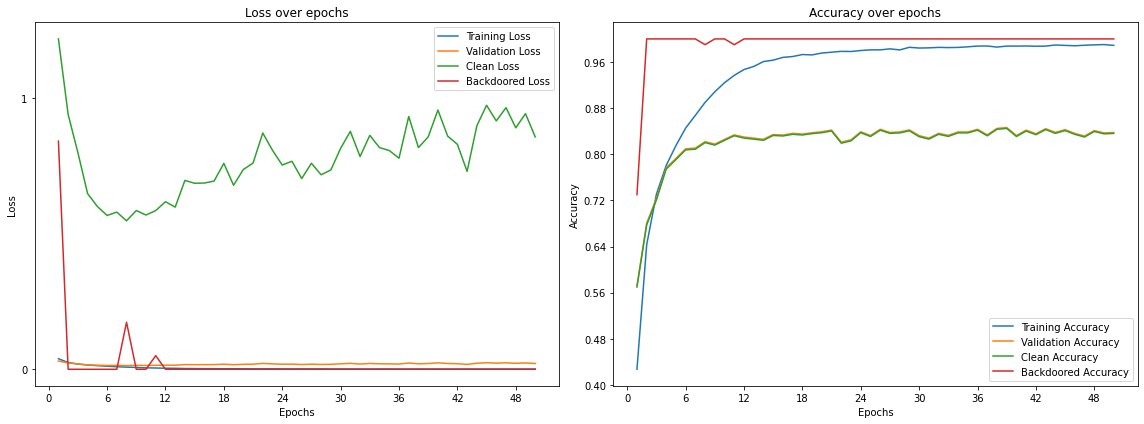

In [1]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader
from torchvision.models import alexnet
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)
    
# Prepare clean dataset
dataset_path = '/home/cc7486/Desktop/Research/cifar10/cifar10/train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms) 
L1 = len(clean_dataset_set)
Len1 = int(0.8*L1)
train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])

def Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path):
        best_model_weights = model.state_dict()
        best_acc = 0.0
        train_best_acc = 0.0
    
        for epoch in tqdm(range(num_epochs), desc="Processing", unit="iteration"):
            # print("epoch {}/{}".format(epoch+1,num_epochs))
            # print("*" * 10)

            for x in ["training","validation","clean","backdoor"]:
                if x == "training" :
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_accuracy = 0

                for data in dataloaders[x]:
                    img , y = data
                    img , y = img.to(device) , y.to(device)

                    optimizer.zero_grad()
                    y_pred = model(img)
                    loss = criterion(y_pred,y)
                    _, preds = torch.max(y_pred, dim=1)

                    if x == 'training':
                        loss.backward()
                        optimizer.step()

                    running_loss += loss.item()
                    running_accuracy += torch.sum(preds == y.data)


                epoch_loss = running_loss / dataset_sizes[x]
                epoch_acc = running_accuracy / dataset_sizes[x]

                # print('{} Loss: {:.4f} || Accuracy: {:.4f}'.format(x, epoch_loss, epoch_acc))

                # Save metrics
                if x == 'training':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                elif x == "validation":
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                elif x == "clean":
                    clean_loss.append(epoch_loss)
                    clean_acc.append(epoch_acc)
                else:
                    back_loss.append(epoch_loss)
                    back_acc.append(epoch_acc)

                # deep copy the model
                if x == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                elif x == "training" and epoch_acc > best_acc:
                    train_best_acc = epoch_acc


        # load best model weights
        torch.save(model.state_dict(), out_path)
        print('Best training Accuracy: {:4f}'.format(train_best_acc))
        print('Best validation Accuracy: {:4f}'.format(best_acc))

for case in range(17, 25):
    datas_path = f'/home/cc7486/Desktop/Research/cifar10/cifar10/backdoored-train/Train_test_{case}'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation
    L2 = len(bck_dataset_set)
    # print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len2 = int(0.8*L2)
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    #Loading the data into DataLoader
    train_loader = DataLoader(dataset=train_set, batch_size=40, shuffle=True)
    valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=True)
    # valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=False)
    clean_val_loader = DataLoader(dataset=val_set, batch_size=1, shuffle=False)
    bck_val_loader = DataLoader(dataset=bck_val_set, batch_size=1, shuffle=False)

    dataloaders = {'training':train_loader,'validation':valid_loader, "clean": clean_val_loader, "backdoor": bck_val_loader}
    dataset_sizes = {'training':len(train_loader.dataset),'validation':len(valid_loader.dataset), "clean": len(clean_val_loader), "backdoor": len(bck_val_loader)}
    # print(dataset_sizes)

    # Store metrics
    train_loss, val_loss, clean_loss, back_loss = [], [], [], []
    train_acc, val_acc, clean_acc, back_acc = [], [], [], []

    model = alexnet(weights=None, num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr = 0.0001)
    num_epochs = 50
    batch_size = 40
    out_path = f"models/cifar_models/alexnet_case_{case}.pt"

    #train the model
    Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path)

    import numpy as np
    from matplotlib.ticker import MaxNLocator
    # Convert the lists to numpy arrays for indexing
    train_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in train_loss])
    val_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in val_loss])
    clean_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in clean_loss])
    back_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in back_loss])
    train_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in train_acc])
    val_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in val_acc])
    clean_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in clean_acc])
    back_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in back_acc])
    epochs = len(train_loss) 

    plt.figure(figsize=(16, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, 1+epochs), y=train_los, label='Training Loss')
    sns.lineplot(x=range(1, 1+epochs), y=val_los, label='Validation Loss')
    sns.lineplot(x=range(1, 1+epochs), y=clean_los, label='Clean Loss')
    sns.lineplot(x=range(1, 1+epochs), y=back_los, label='Backdoored Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, 1+epochs), y=train_ac, label='Training Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=val_ac, label='Validation Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=clean_ac, label='Clean Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=back_ac, label='Backdoored Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Processing: 100%|██████████| 50/50 [40:08<00:00, 48.16s/iteration]


Best training Accuracy: 0.998482
Best validation Accuracy: 0.997769


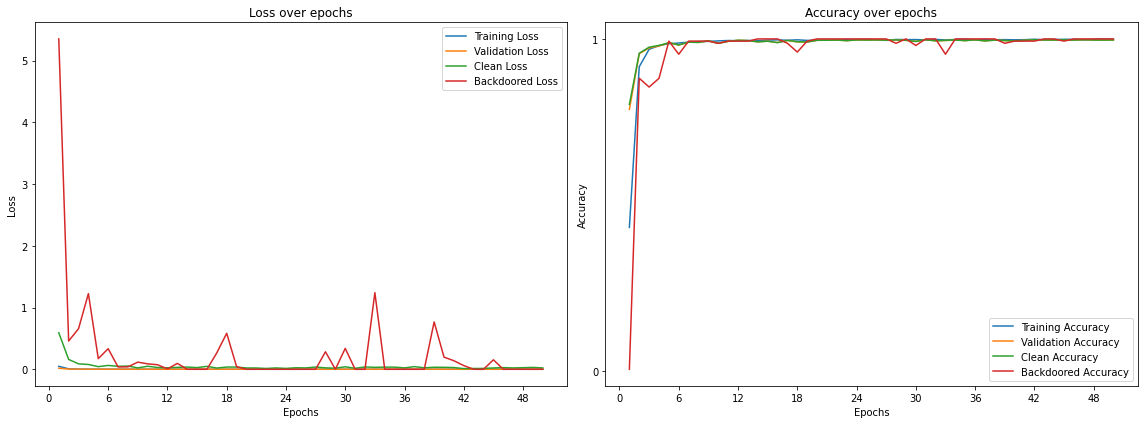

Processing: 100%|██████████| 50/50 [1:06:06<00:00, 79.34s/iteration] 


Best training Accuracy: 0.999027
Best validation Accuracy: 0.997893


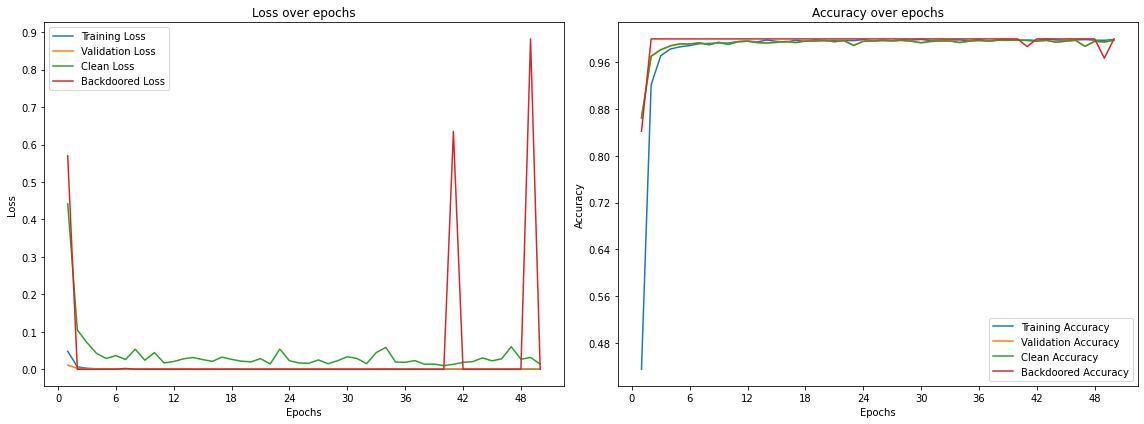

Processing: 100%|██████████| 50/50 [41:28<00:00, 49.78s/iteration]


Best training Accuracy: 0.999701
Best validation Accuracy: 0.998637


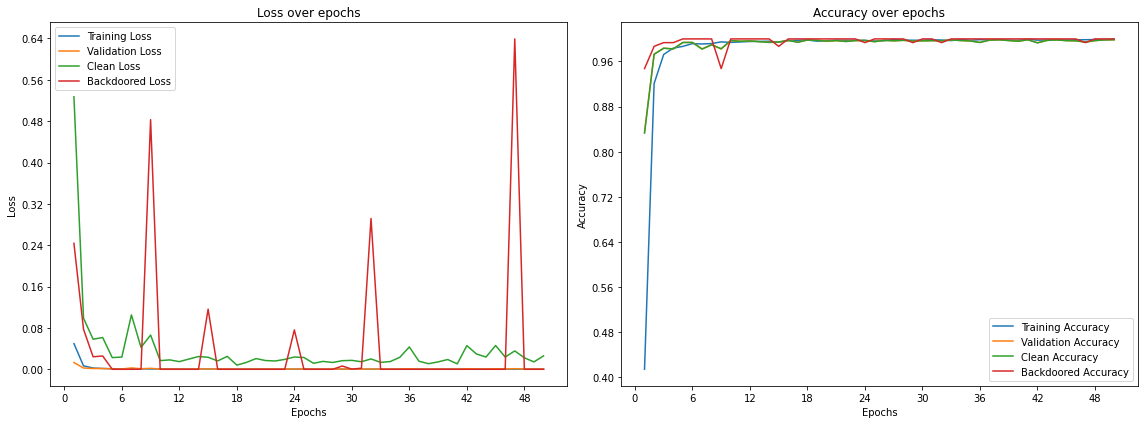

Processing: 100%|██████████| 50/50 [42:16<00:00, 50.74s/iteration]


Best training Accuracy: 0.999178
Best validation Accuracy: 0.998265


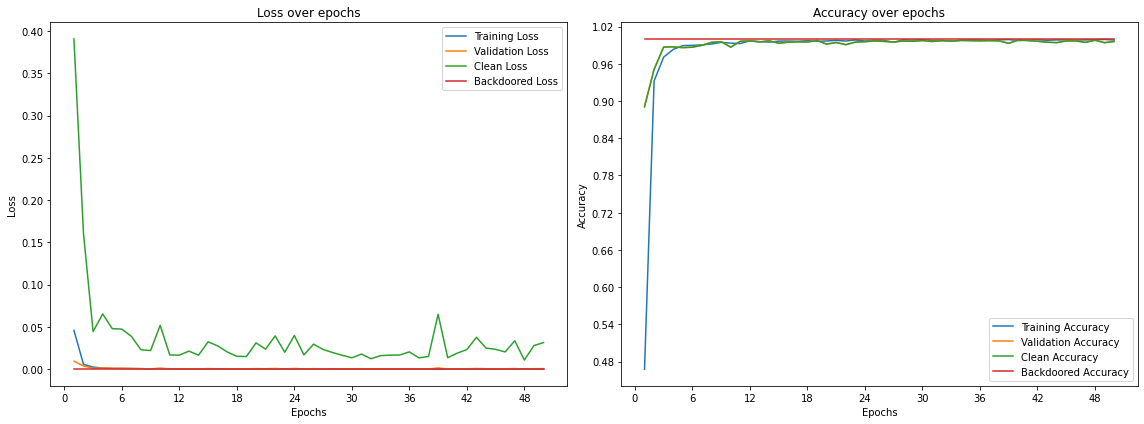

In [1]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)
    
# Prepare clean dataset
dataset_path = '/home/cc7486/Desktop/Research/MLLsecurity/gtsrb-german-traffic-sign/Train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms) 
L1 = len(clean_dataset_set)
Len1 = int(0.8*L1)
train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])

def Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path):
        best_model_weights = model.state_dict()
        best_acc = 0.0
        train_best_acc = 0.0
    
        for epoch in tqdm(range(num_epochs), desc="Processing", unit="iteration"):
            # print("epoch {}/{}".format(epoch+1,num_epochs))
            # print("*" * 10)

            for x in ["training","validation","clean","backdoor"]:
                if x == "training" :
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_accuracy = 0

                for data in dataloaders[x]:
                    img , y = data
                    img , y = img.to(device) , y.to(device)

                    optimizer.zero_grad()
                    y_pred = model(img)
                    loss = criterion(y_pred,y)
                    _, preds = torch.max(y_pred, dim=1)

                    if x == 'training':
                        loss.backward()
                        optimizer.step()

                    running_loss += loss.item()
                    running_accuracy += torch.sum(preds == y.data)


                epoch_loss = running_loss / dataset_sizes[x]
                epoch_acc = running_accuracy / dataset_sizes[x]

                # print('{} Loss: {:.4f} || Accuracy: {:.4f}'.format(x, epoch_loss, epoch_acc))

                # Save metrics
                if x == 'training':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                elif x == "validation":
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                elif x == "clean":
                    clean_loss.append(epoch_loss)
                    clean_acc.append(epoch_acc)
                else:
                    back_loss.append(epoch_loss)
                    back_acc.append(epoch_acc)

                # deep copy the model
                if x == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                elif x == "training" and epoch_acc > best_acc:
                    train_best_acc = epoch_acc


        # load best model weights
        torch.save(model.state_dict(), out_path)
        print('Best training Accuracy: {:4f}'.format(train_best_acc))
        print('Best validation Accuracy: {:4f}'.format(best_acc))

for case in range(1, 7):
    if case in [3,4]:
        continue
    datas_path = f'/home/cc7486/Desktop/Research/MLLsecurity/gtsrb-german-traffic-sign/backdoored-train/780/Train_test_{case}/'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation
    L2 = len(bck_dataset_set)
    # print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len2 = int(0.8*L2)
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    #Loading the data into DataLoader
    train_loader = DataLoader(dataset=train_set, batch_size=40, shuffle=True)
    valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=True)
    # valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=False)
    clean_val_loader = DataLoader(dataset=val_set, batch_size=1, shuffle=False)
    bck_val_loader = DataLoader(dataset=bck_val_set, batch_size=1, shuffle=False)

    dataloaders = {'training':train_loader,'validation':valid_loader, "clean": clean_val_loader, "backdoor": bck_val_loader}
    dataset_sizes = {'training':len(train_loader.dataset),'validation':len(valid_loader.dataset), "clean": len(clean_val_loader), "backdoor": len(bck_val_loader)}
    # print(dataset_sizes)

    # Store metrics
    train_loss, val_loss, clean_loss, back_loss = [], [], [], []
    train_acc, val_acc, clean_acc, back_acc = [], [], [], []


    from torchvision.models import alexnet
    model = alexnet(weights=None, num_classes=43).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.0001)
    num_epochs = 50
    batch_size = 40
    out_path = f"models/780/alexnet_case_{case}.pt"

    #train the model
    Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path)

    import numpy as np
    from matplotlib.ticker import MaxNLocator
    # Convert the lists to numpy arrays for indexing
    train_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in train_loss])
    val_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in val_loss])
    clean_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in clean_loss])
    back_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in back_loss])
    train_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in train_acc])
    val_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in val_acc])
    clean_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in clean_acc])
    back_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in back_acc])
    epochs = len(train_loss) 

    plt.figure(figsize=(16, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, 1+epochs), y=train_los, label='Training Loss')
    sns.lineplot(x=range(1, 1+epochs), y=val_los, label='Validation Loss')
    sns.lineplot(x=range(1, 1+epochs), y=clean_los, label='Clean Loss')
    sns.lineplot(x=range(1, 1+epochs), y=back_los, label='Backdoored Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, 1+epochs), y=train_ac, label='Training Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=val_ac, label='Validation Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=clean_ac, label='Clean Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=back_ac, label='Backdoored Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

Processing: 100%|██████████| 50/50 [39:03<00:00, 46.87s/iteration]


Best training Accuracy: 0.999281
Best validation Accuracy: 0.998625


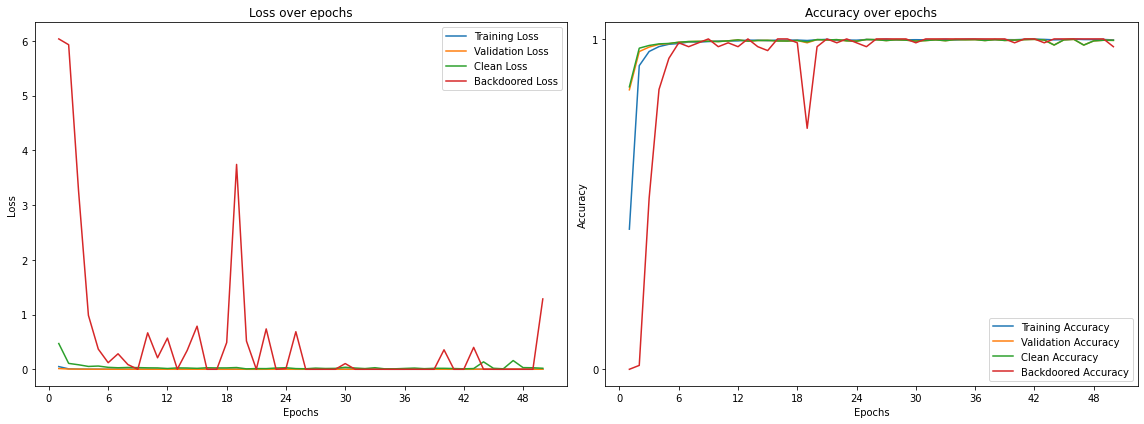

Processing: 100%|██████████| 50/50 [39:34<00:00, 47.50s/iteration]


Best training Accuracy: 0.998732
Best validation Accuracy: 0.998625


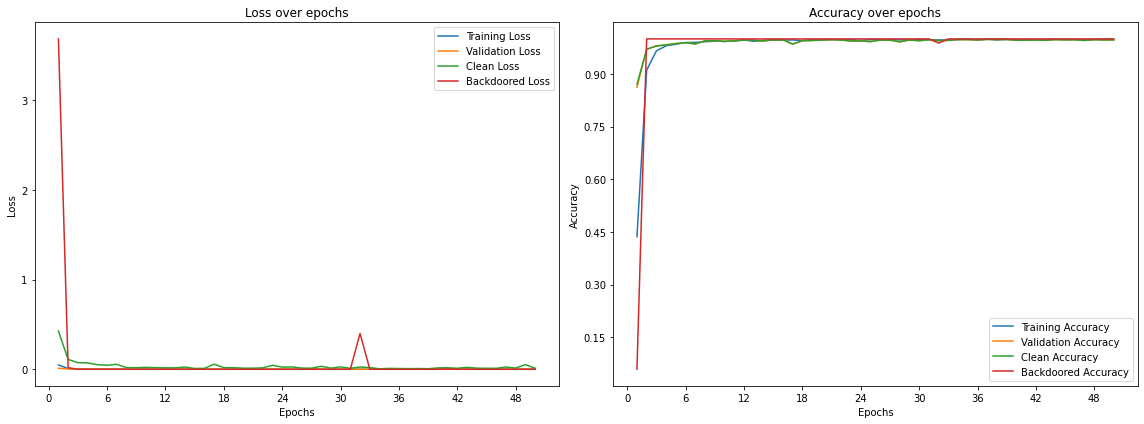

Processing: 100%|██████████| 50/50 [40:01<00:00, 48.04s/iteration]


Best training Accuracy: 0.998623
Best validation Accuracy: 0.998125


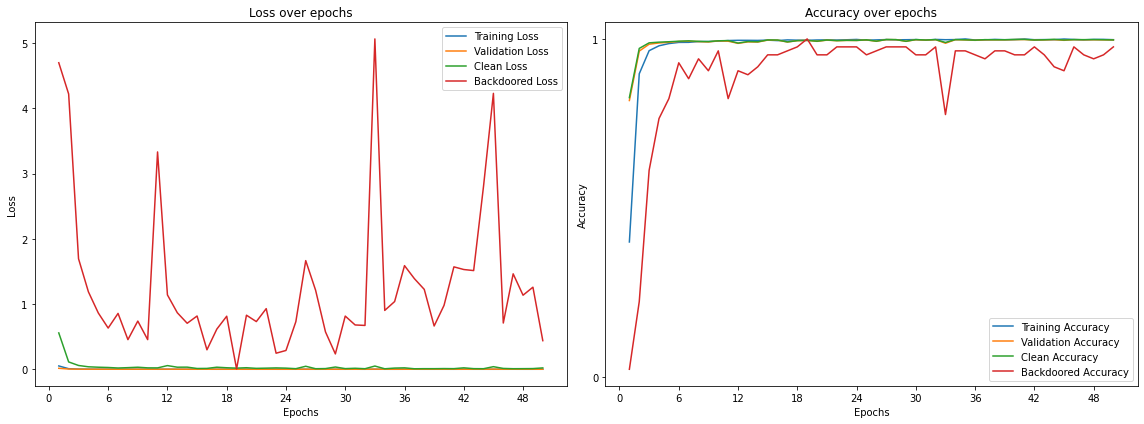

Processing: 100%|██████████| 50/50 [40:31<00:00, 48.64s/iteration]


Best training Accuracy: 0.999031
Best validation Accuracy: 0.998125


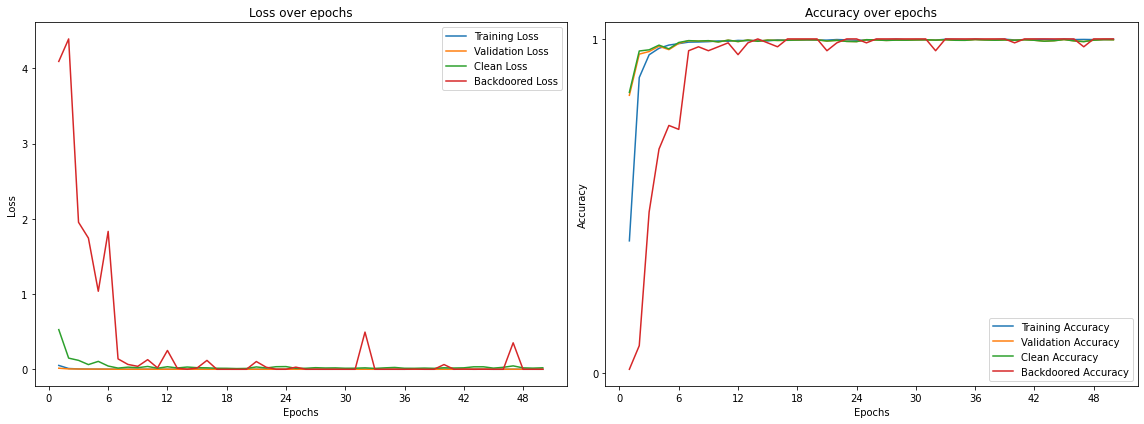

Processing: 100%|██████████| 50/50 [40:58<00:00, 49.17s/iteration]


Best training Accuracy: 0.999251
Best validation Accuracy: 0.998625


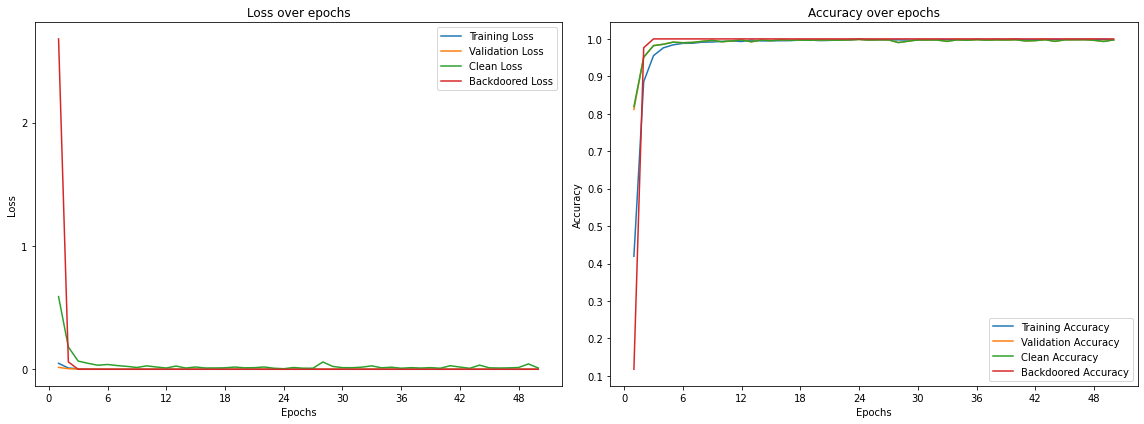

Processing: 100%|██████████| 50/50 [41:29<00:00, 49.79s/iteration]


Best training Accuracy: 0.998754
Best validation Accuracy: 0.998875


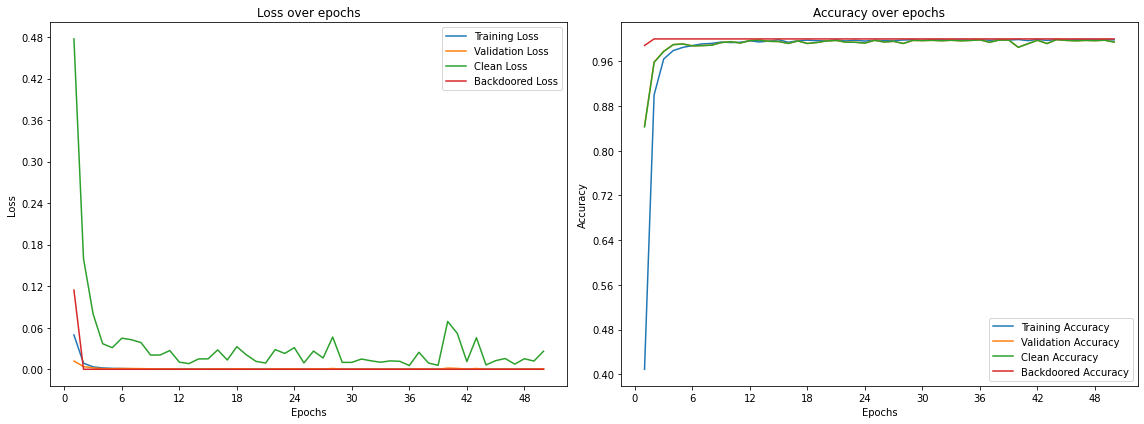

Processing: 100%|██████████| 50/50 [41:57<00:00, 50.34s/iteration]


Best training Accuracy: 0.998766
Best validation Accuracy: 0.998875


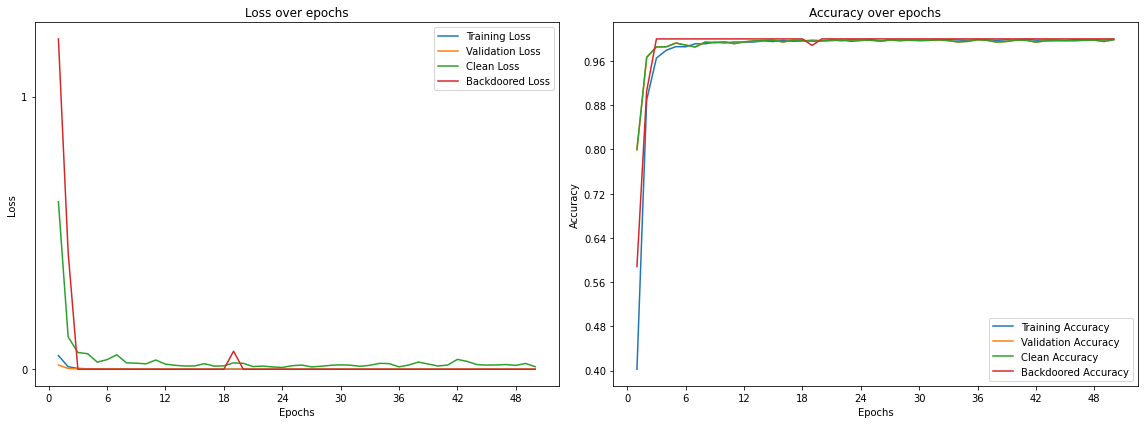

Processing: 100%|██████████| 50/50 [42:29<00:00, 51.00s/iteration]


Best training Accuracy: 0.998982
Best validation Accuracy: 0.998500


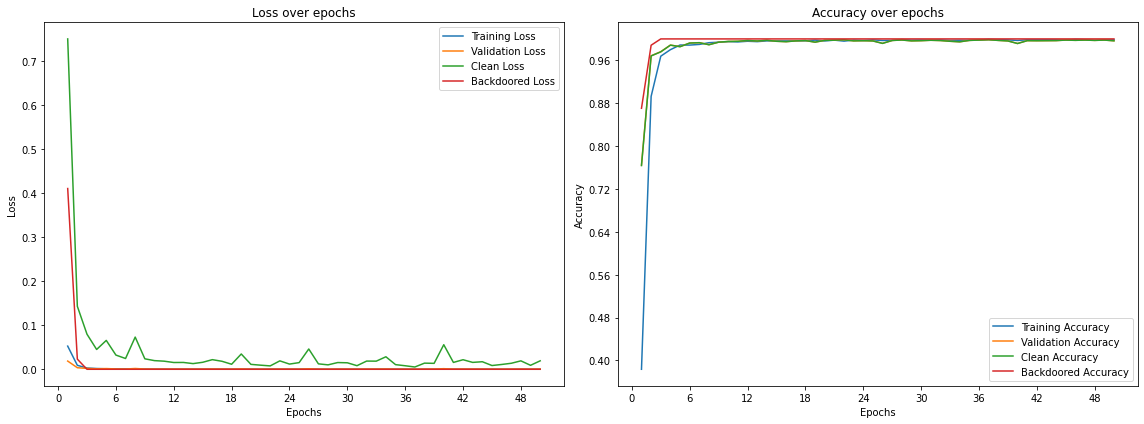

Processing: 100%|██████████| 50/50 [42:55<00:00, 51.51s/iteration]


Best training Accuracy: 0.998963
Best validation Accuracy: 0.998750


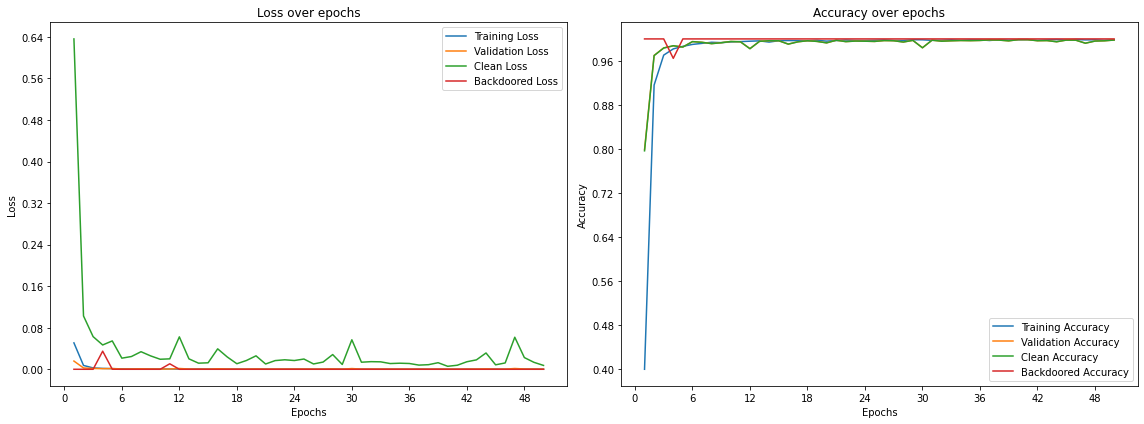

Processing: 100%|██████████| 50/50 [43:26<00:00, 52.13s/iteration]


Best training Accuracy: 0.998916
Best validation Accuracy: 0.998875


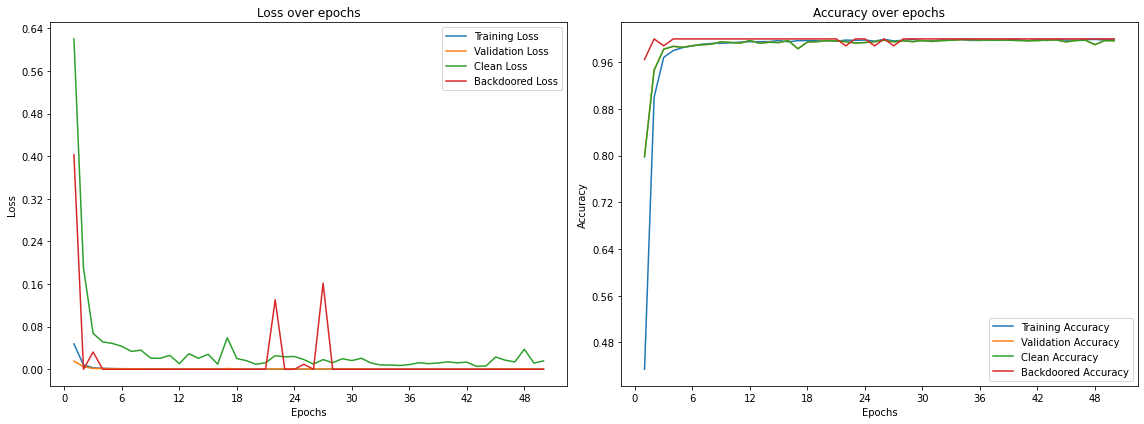

Processing: 100%|██████████| 50/50 [43:53<00:00, 52.67s/iteration]


Best training Accuracy: 0.999152
Best validation Accuracy: 0.998875


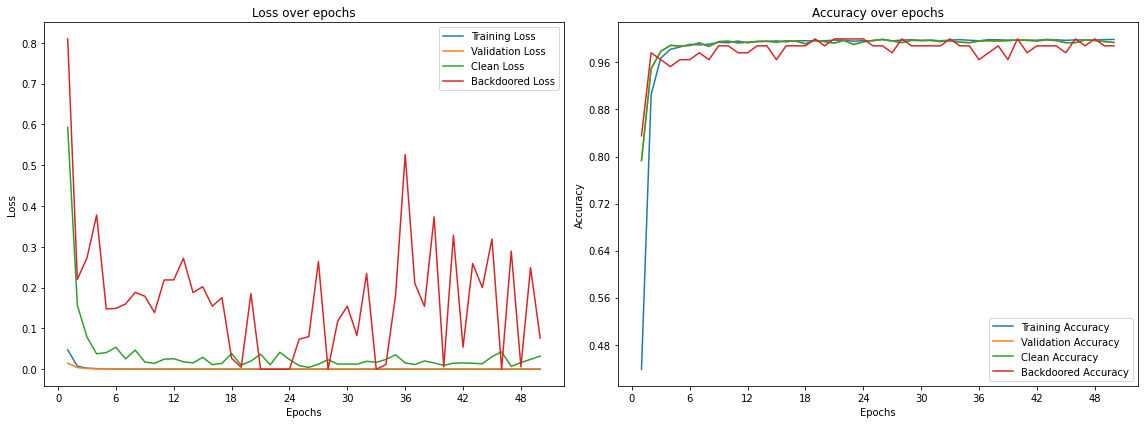

Processing: 100%|██████████| 50/50 [44:22<00:00, 53.25s/iteration]


Best training Accuracy: 0.998993
Best validation Accuracy: 0.998875


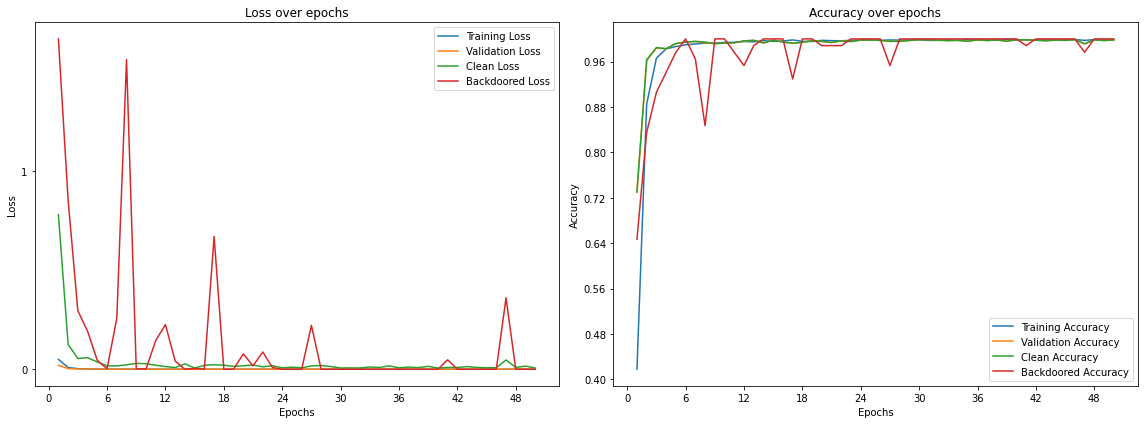

Processing: 100%|██████████| 50/50 [44:53<00:00, 53.87s/iteration]


Best training Accuracy: 0.999556
Best validation Accuracy: 0.998625


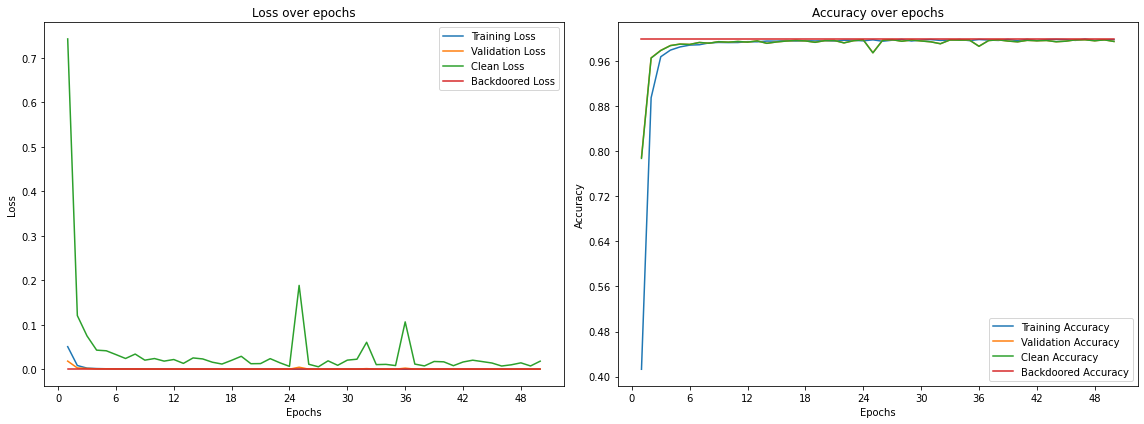

Processing: 100%|██████████| 50/50 [45:21<00:00, 54.44s/iteration]


Best training Accuracy: 0.998407
Best validation Accuracy: 0.998375


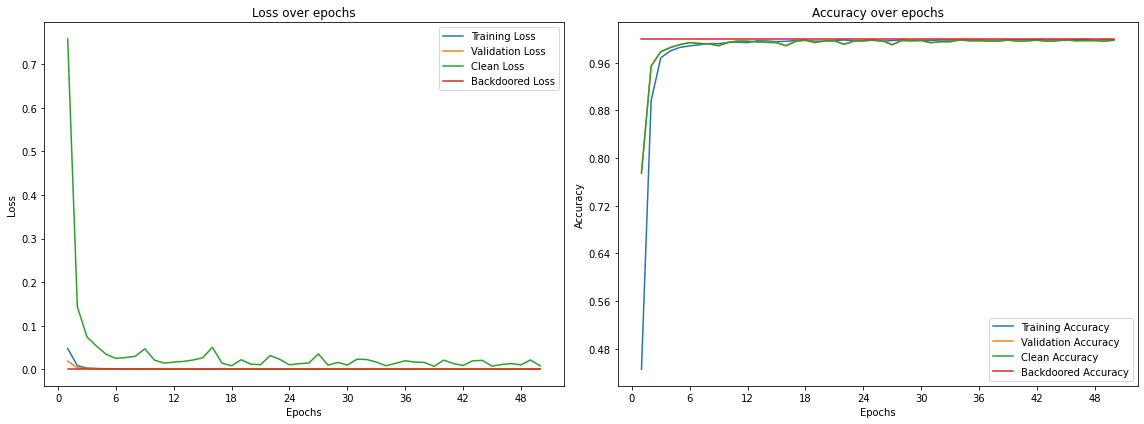

Processing: 100%|██████████| 50/50 [45:44<00:00, 54.90s/iteration]


Best training Accuracy: 0.998912
Best validation Accuracy: 0.998750


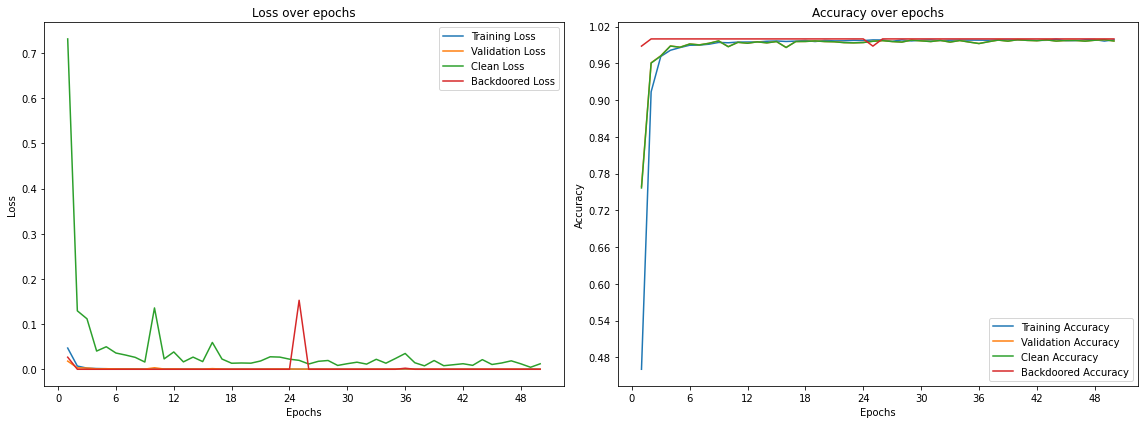

Processing: 100%|██████████| 50/50 [46:26<00:00, 55.72s/iteration]


Best training Accuracy: 0.999218
Best validation Accuracy: 0.998875


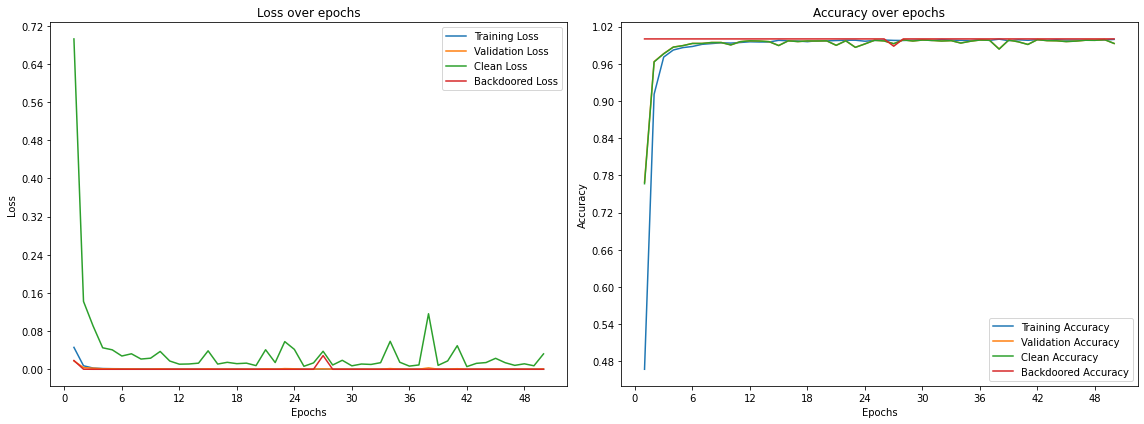

Processing: 100%|██████████| 50/50 [46:48<00:00, 56.17s/iteration]


Best training Accuracy: 0.999252
Best validation Accuracy: 0.999125


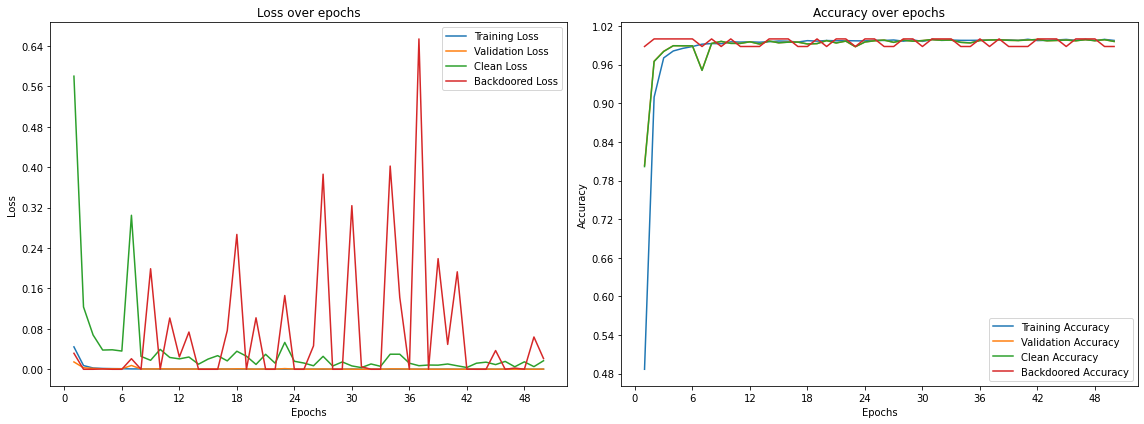

Processing: 100%|██████████| 50/50 [47:30<00:00, 57.00s/iteration]


Best training Accuracy: 0.998809
Best validation Accuracy: 0.998625


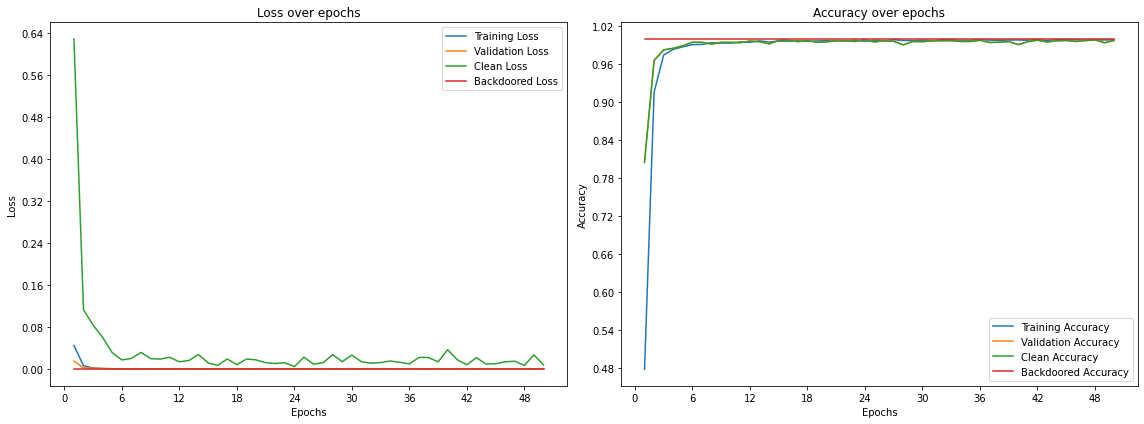

Processing: 100%|██████████| 50/50 [47:49<00:00, 57.39s/iteration]


Best training Accuracy: 0.999029
Best validation Accuracy: 0.998500


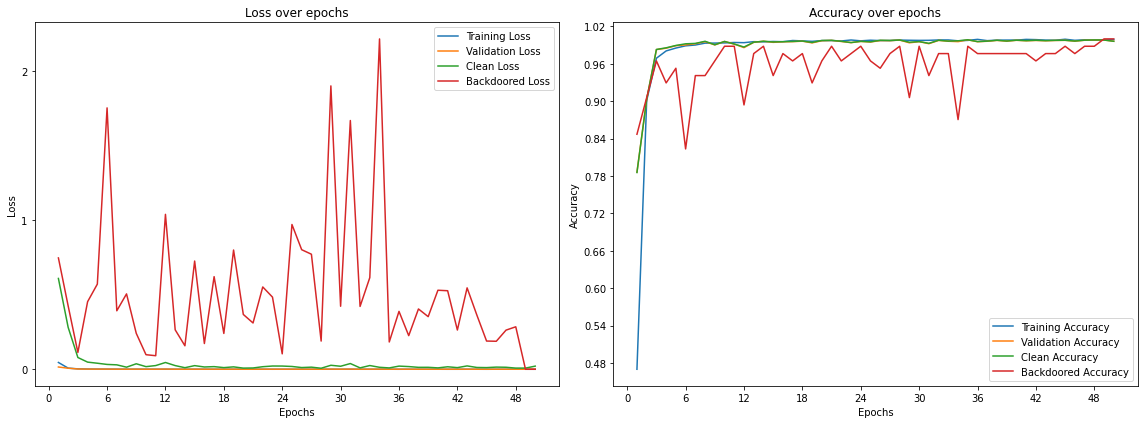

Processing: 100%|██████████| 50/50 [48:16<00:00, 57.93s/iteration]


Best training Accuracy: 0.998622
Best validation Accuracy: 0.998500


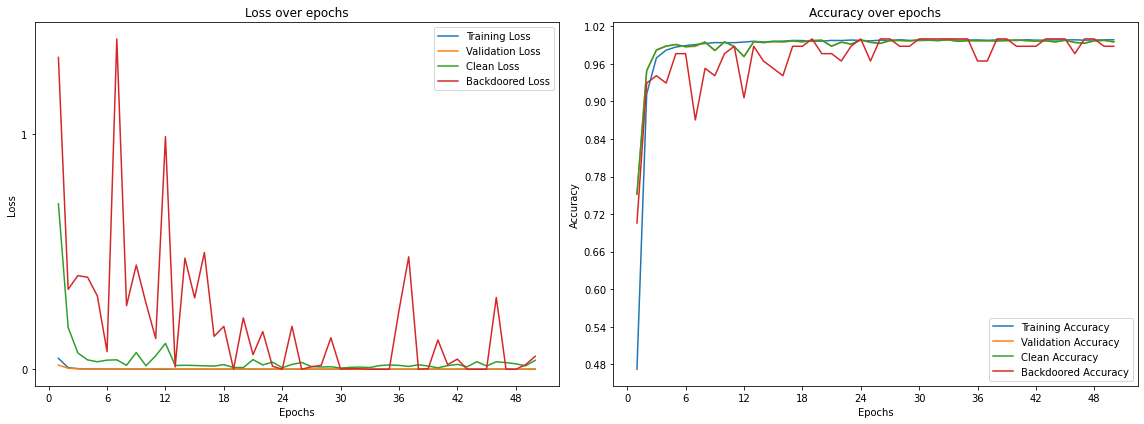

Processing: 100%|██████████| 50/50 [48:48<00:00, 58.57s/iteration]


Best training Accuracy: 0.999098
Best validation Accuracy: 0.998875


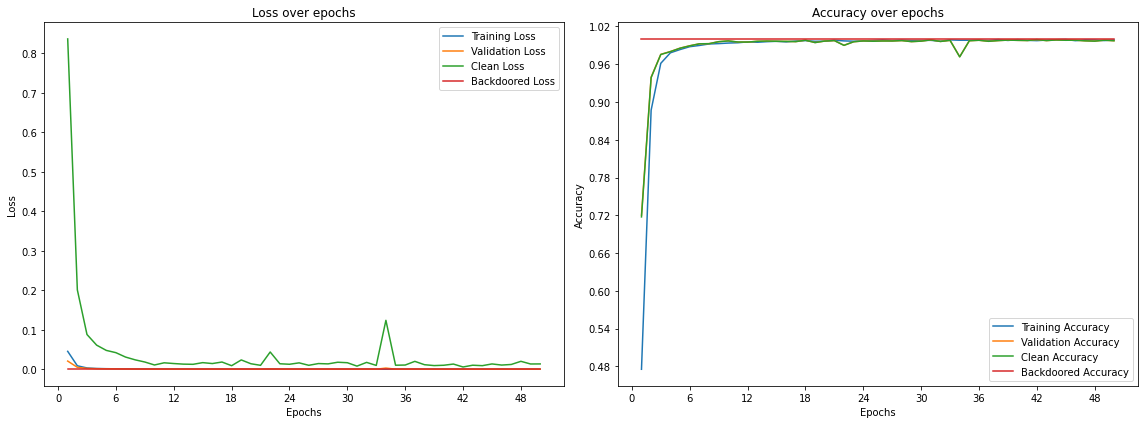

Processing: 100%|██████████| 50/50 [49:20<00:00, 59.21s/iteration]


Best training Accuracy: 0.998645
Best validation Accuracy: 0.998500


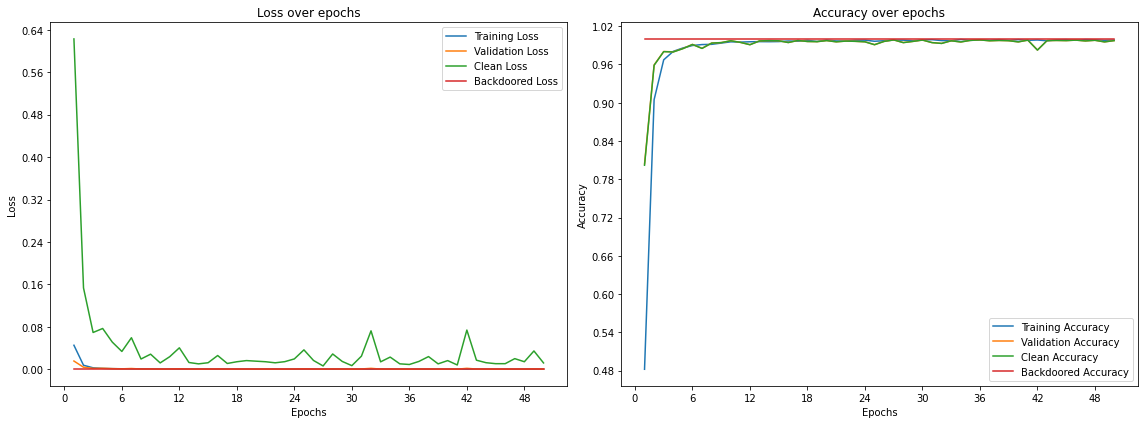

Processing: 100%|██████████| 50/50 [49:50<00:00, 59.80s/iteration]


Best training Accuracy: 0.998328
Best validation Accuracy: 0.998250


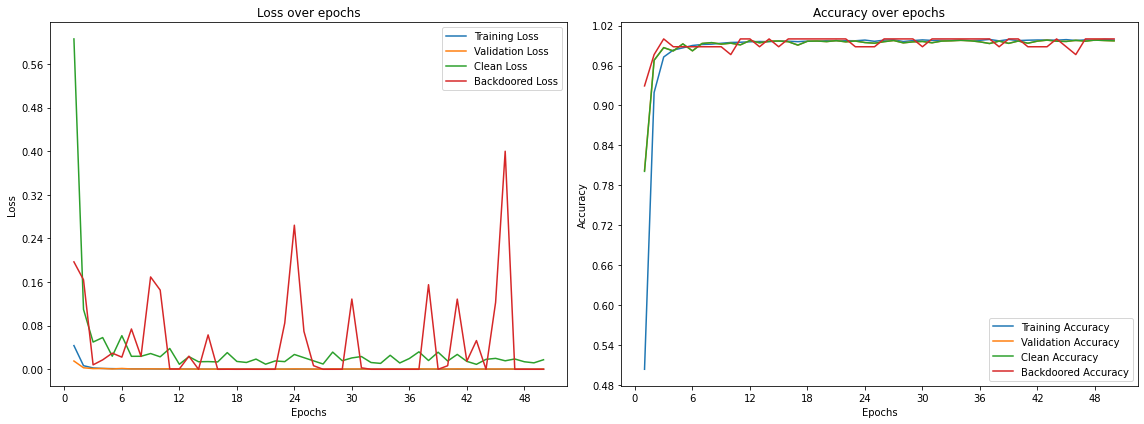

Processing: 100%|██████████| 50/50 [50:13<00:00, 60.26s/iteration]


Best training Accuracy: 0.998367
Best validation Accuracy: 0.998250


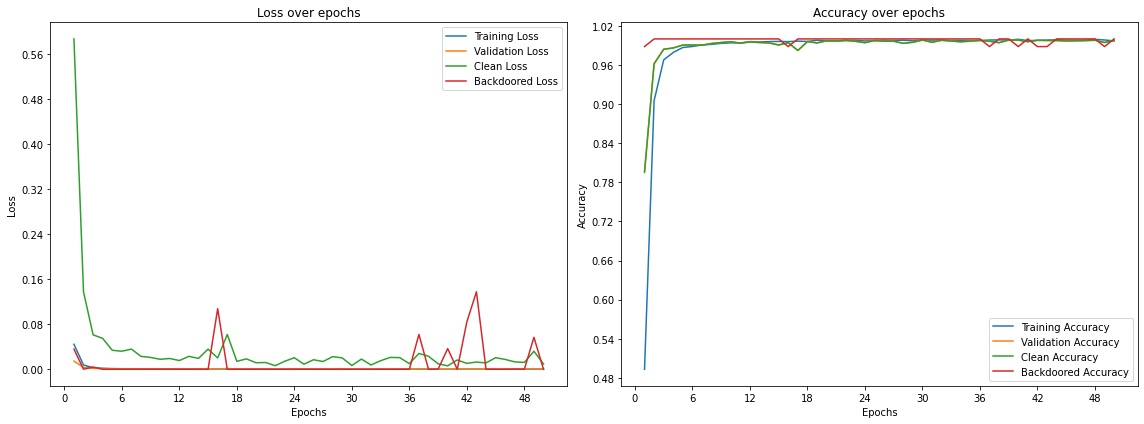

In [2]:
# With clean and backdoored validation
import numpy as np 
import pandas as pd 
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import seaborn as sns
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter

from PIL import Image
from skimage import io

from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split, Dataset, ConcatDataset
import torch.optim as optim

import torchvision.datasets
import torchvision.transforms as T 
from torchvision.io import read_image
from torchvision.datasets import DatasetFolder
from torchvision.datasets.folder import default_loader
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transforming the Data ToTensor and Normalize it 
transforms = T.Compose([T.ToTensor(),T.Resize((256,256)),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

class TSignsDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.class_counts = Counter()  # Counter to store class counts
        
        # Iterate over each folder (class) in the directory
        for class_id in os.listdir(root_dir):
            class_dir = os.path.join(root_dir, class_id)
            
            # Make sure it's a directory
            if os.path.isdir(class_dir):
                for filename in os.listdir(class_dir):
                    if filename.endswith(".jpg") or filename.endswith(".png"):
                        self.data.append({
                            'path': os.path.join(class_dir, filename),
                            'class_id': int(class_id)
                        })
                        # Increment the count for the current class_id
                        self.class_counts[int(class_id)] += 1
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        image_path = self.data[index]['path']
        image = Image.open(image_path)
        y_class = torch.tensor(self.data[index]['class_id'])
        
        if self.transform:
            image = self.transform(image)

        return (image, y_class)
    
# Prepare clean dataset
dataset_path = '/home/cc7486/Desktop/Research/MLLsecurity/gtsrb-german-traffic-sign/Train'
clean_dataset_set = TSignsDataset(dataset_path,transform=transforms) 
L1 = len(clean_dataset_set)
Len1 = int(0.8*L1)
train_set, val_set = random_split(clean_dataset_set,[Len1,int(L1-Len1)])

def Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path):
        best_model_weights = model.state_dict()
        best_acc = 0.0
        train_best_acc = 0.0
    
        for epoch in tqdm(range(num_epochs), desc="Processing", unit="iteration"):
            # print("epoch {}/{}".format(epoch+1,num_epochs))
            # print("*" * 10)

            for x in ["training","validation","clean","backdoor"]:
                if x == "training" :
                    model.train()
                else:
                    model.eval()

                running_loss = 0.0
                running_accuracy = 0

                for data in dataloaders[x]:
                    img , y = data
                    img , y = img.to(device) , y.to(device)

                    optimizer.zero_grad()
                    y_pred = model(img)
                    loss = criterion(y_pred,y)
                    _, preds = torch.max(y_pred, dim=1)

                    if x == 'training':
                        loss.backward()
                        optimizer.step()

                    running_loss += loss.item()
                    running_accuracy += torch.sum(preds == y.data)


                epoch_loss = running_loss / dataset_sizes[x]
                epoch_acc = running_accuracy / dataset_sizes[x]

                # print('{} Loss: {:.4f} || Accuracy: {:.4f}'.format(x, epoch_loss, epoch_acc))

                # Save metrics
                if x == 'training':
                    train_loss.append(epoch_loss)
                    train_acc.append(epoch_acc)
                elif x == "validation":
                    val_loss.append(epoch_loss)
                    val_acc.append(epoch_acc)
                elif x == "clean":
                    clean_loss.append(epoch_loss)
                    clean_acc.append(epoch_acc)
                else:
                    back_loss.append(epoch_loss)
                    back_acc.append(epoch_acc)

                # deep copy the model
                if x == 'validation' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                elif x == "training" and epoch_acc > best_acc:
                    train_best_acc = epoch_acc


        # load best model weights
        torch.save(model.state_dict(), out_path)
        print('Best training Accuracy: {:4f}'.format(train_best_acc))
        print('Best validation Accuracy: {:4f}'.format(best_acc))

for case in range(1, 25):
    datas_path = f'/home/cc7486/Desktop/Research/MLLsecurity/gtsrb-german-traffic-sign/backdoored-train/Fix-gen/Train_test_{case}/'
    bck_dataset_set = TSignsDataset(datas_path,transform=transforms)

    #splitting the data into training and validation
    L2 = len(bck_dataset_set)
    # print(f"Total length of Dataset Imported: ",L1, L2, L1+L2)
    Len2 = int(0.8*L2)
    bck_train_set, bck_val_set = random_split(bck_dataset_set,[Len2,int(L2-Len2)])

    # Combine Datasets
    train_set = ConcatDataset([train_set, bck_train_set])
    vali_set = ConcatDataset([val_set, bck_val_set])

    #Loading the data into DataLoader
    train_loader = DataLoader(dataset=train_set, batch_size=40, shuffle=True)
    valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=True)
    # valid_loader = DataLoader(dataset=vali_set, batch_size=40, shuffle=False)
    clean_val_loader = DataLoader(dataset=val_set, batch_size=1, shuffle=False)
    bck_val_loader = DataLoader(dataset=bck_val_set, batch_size=1, shuffle=False)

    dataloaders = {'training':train_loader,'validation':valid_loader, "clean": clean_val_loader, "backdoor": bck_val_loader}
    dataset_sizes = {'training':len(train_loader.dataset),'validation':len(valid_loader.dataset), "clean": len(clean_val_loader), "backdoor": len(bck_val_loader)}
    # print(dataset_sizes)

    # Store metrics
    train_loss, val_loss, clean_loss, back_loss = [], [], [], []
    train_acc, val_acc, clean_acc, back_acc = [], [], [], []


    from torchvision.models import alexnet
    model = alexnet(weights=None, num_classes=43).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),lr = 0.0001)
    num_epochs = 50
    batch_size = 40
    out_path = f"models/50-epoch_model/alexnet_case_{case}.pt"

    #train the model
    Train(model,criterion,optimizer,num_epochs,batch_size,dataloaders,out_path)

    import numpy as np
    from matplotlib.ticker import MaxNLocator
    # Convert the lists to numpy arrays for indexing
    train_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in train_loss])
    val_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in val_loss])
    clean_los = np.array([tl.cpu() if isinstance(tl, torch.Tensor) else tl for tl in clean_loss])
    back_los = np.array([vl.cpu() if isinstance(vl, torch.Tensor) else vl for vl in back_loss])
    train_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in train_acc])
    val_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in val_acc])
    clean_ac = np.array([ta.cpu() if isinstance(ta, torch.Tensor) else ta for ta in clean_acc])
    back_ac = np.array([va.cpu() if isinstance(va, torch.Tensor) else va for va in back_acc])
    epochs = len(train_loss) 

    plt.figure(figsize=(16, 6))

    # Plotting Loss
    plt.subplot(1, 2, 1)
    sns.lineplot(x=range(1, 1+epochs), y=train_los, label='Training Loss')
    sns.lineplot(x=range(1, 1+epochs), y=val_los, label='Validation Loss')
    sns.lineplot(x=range(1, 1+epochs), y=clean_los, label='Clean Loss')
    sns.lineplot(x=range(1, 1+epochs), y=back_los, label='Backdoored Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    # Plotting Accuracy
    plt.subplot(1, 2, 2)
    sns.lineplot(x=range(1, 1+epochs), y=train_ac, label='Training Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=val_ac, label='Validation Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=clean_ac, label='Clean Accuracy')
    sns.lineplot(x=range(1, 1+epochs), y=back_ac, label='Backdoored Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()